In [1250]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymannkendall as mann_kendall
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress


def translate_col_name(col_name: str):
    # Define a dictionary mapping column names to their plain English translations
    col_name_dict = {
        'AI': 'Aridity Index',
        'EI': 'Evaporative Index',
        'Ep': 'Potential Evaporation',
        'Pa': 'Precipitation',
        'ST': 'Seasonality Timing',
        'SI': 'Seasonality Index',
        'Sr': 'Root-zone Storage Capacity $S_{r,20y}$',
        'T': 'Temperature',
        'is_dur': 'Interstorm duration',
        'omega': 'Budyko curve (Fu) parameter',
        'change': 'Change',
        'normalized': 'Normalized',
        'p10': '10th percentile',
        'p90': '90th percentile',
        'catchment': 'Catchment',
        'mean': '\nDecadal Mean',
        'diff':'Change',
        'ups': 'Upstream',
        'area': 'Area\n',
        'r': 'Classified',
        'c': 'CORINE',
        '1': '(Artificial)\n',
        '2': '(Agricultural)\n',
        '3': '(Forest)\n',
        '4': '(Wetlands)\n',
        '5': '(Waterbodies)\n',
        '6': '(Masked cloud)\n',
        'h': 'HILDA +',
        'pct':'Percent',
        'ds':'Datasets Grouping',
        'ai': 'Aridity Grouping',
        'all':'All Datasets',
        'adj':'adjusted',
        'is':'interstorm',
        'dur':'duration',
        'res':'$_{res}$',
        'clim':'$_{clim}$',
        'dy':'$\Delta EI$'
    }

    # Split the column name into words
    words = col_name.split('_')

    if words[0] == 'r':
        # Combine the translation of the first word with the translation of the second word in parentheses
        translated_words = [col_name_dict.get(words[0]), col_name_dict.get(words[1])]
        # Join the translated words and return the result
        return ' '.join(translated_words)
    
    elif words[0] == 'h' or words[1] == 'h':
        # Use the specific translation dictionary for 'h' columns
        specific_dict = {
            'h': 'HILDA +',
            'change': 'Change',
            'normalized': 'Normalized',
            'p10': '10th percentile',
            'p90': '90th percentile',
            'catchment': 'Catchment',
            'mean': 'Decadal Mean',
            'ups': 'Upstream\n',
            'area': 'Area\n',
            '1': '(Artificial)\n',
            '2': '(Cropland)\n',
            '3': '(Pasture/Rangeland)\n',
            '4': '(Forest)\n',
            '5': '(Grass/Shrubland)\n',
            '6': '(Sparse/No vegetation)\n',
            '7': '(Water)\n',
            '9': 'No data',
            '99':'(agricultural)',
            '89':'(Forest and Seminatural)'}
        # Combine the translation of the first word with the translation of the second word in parentheses
        translated_words = [specific_dict.get(word) for word in words]
        # Join the translated words and return the result
        return ' '.join(translated_words)
    else:
        # Translate each word in the column name
        
        translated_words = [col_name_dict.get(word, word) for word in words]
        # print(translated_words)
        # Join the translated words and return the result
        return ' '.join(translated_words)


In [ ]:
annual_lc = pd.read_excel('../Outputs/all/SR_Class_Areatable_annual.xlsx', index_col=None)
annual_lc.drop_duplicates(subset=['catchment', 'image_date'], keep='first', inplace=True)

In [ ]:
annual_lc.loc[annual_lc.catchment=='Membre Pont', ['image_date', 'catchment', 'h_1']]

In [ ]:
merged = pd.read_excel('../Outputs/all/merge_HC_SR.xlsx', index_col=None)


In [ ]:
merged.loc[merged.catchment=='La Meuse Stenay', ['image_date', 'catchment', 'h_1', 'h_1_change', 'AI_mean', 'AI_mean_diff', 'AI_change']]

In [ ]:
merged.drop_duplicates(subset=['catchment', 'image_date'], keep='first', inplace=True)

In [ ]:
merged.loc[merged.catchment==8009, ['image_date', 'catchment', 'h_1', 'h_1_change', 'AI_mean', 'AI_mean_diff', 'AI_change']]

In [ ]:
merged_df = merged.copy()
merged.loc[merged.catchment==8009, ['image_date', 'catchment', 'h_1', 'h_1_change', 'AI_mean', 'AI_mean_diff', 'AI_change']]

In [ ]:
keys = ['EVI_area', 'GNDVI_area', 'NBR_area', 'NDFI_area', 'NDMI_area', 'NDSI_area', 'NDVI_area', 'TCA_area', 'TCB_area', 'TCG_area', 'TCW_area', 
        'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5',  'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_99', 'h_89',
        'B1_mean', 'B1_stdDev', 'B2_mean', 'B2_stdDev', 'B3_mean', 'B3_stdDev', 'B4_mean', 'B4_stdDev', 'B5_mean', 'B5_stdDev', 'B7_mean', 'B7_stdDev', 
        'EVI_mean', 'EVI_stdDev', 'GNDVI_mean', 'GNDVI_stdDev', 'NBR_mean', 'NBR_stdDev', 'NDFI_mean', 'NDFI_stdDev', 'NDMI_mean', 'NDMI_stdDev', 'NDSI_mean', 
        'NDSI_stdDev', 'NDVI_mean', 'NDVI_stdDev', 'TCA_mean', 'TCA_stdDev', 'TCB_mean', 'TCB_stdDev', 'TCG_mean', 'TCG_stdDev', 'TCW_mean', 'TCW_stdDev']

SR_keys = [
        'B1_mean', 'B1_stdDev', 'B2_mean', 'B2_stdDev', 'B3_mean', 'B3_stdDev', 'B4_mean', 'B4_stdDev', 'B5_mean', 'B5_stdDev', 'B7_mean', 'B7_stdDev', 
        'EVI_mean', 'EVI_stdDev', 'GNDVI_mean', 'GNDVI_stdDev', 'NBR_mean', 'NBR_stdDev', 'NDMI_mean', 'NDMI_stdDev', 
         'NDVI_mean', 'NDVI_stdDev', 'TCA_mean', 'TCA_stdDev', 'TCB_mean', 'TCB_stdDev', 'TCG_mean', 'TCG_stdDev', 'TCW_mean', 'TCW_stdDev']

area_keys = ['EVI_area', 'GNDVI_area', 'NBR_area', 'NDFI_area', 'NDMI_area', 'NDSI_area', 'NDVI_area', 'TCA_area', 'TCB_area', 'TCG_area', 'TCW_area', # each area key relates to a km2 
             'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 
             'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_99', 'h_89',
             'c_1', 'c_2', 'c_3', 'c_4', 'c_5',
            'catchment_area']
HC_keys = ['AI_mean','EI_mean','Ep_mean','Pa_mean','SI_mean','ST_mean','Sr_mean','T_mean','is_dur_mean','omega_mean',]

ups_area_keys = ['ups_'+key for key in area_keys]

ups_area_norm_keys = ['ups_'+key+'_normalized' for key in area_keys]


In [ ]:
df = annual_lc[annual_lc.dataset=='Meuse']
display(df[df.catchment=='Amay'].image_date)
# print(list(df[df.catchment=='Amay'].keys()))


catchment = 'Amay'
fig, ax = plt.subplots(figsize=(10, 6.18))
ax.set_title('Upstream '+catchment+' Urban')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_h_1, c='g', label='HILDA+')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_r_1, c='b', label='Classified Landsat')
ax.scatter(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_c_1, c='r', label='CORINE')
ax.legend()


fig, ax = plt.subplots(figsize=(10, 6.18))
ax.set_title('Upstream '+catchment+' Grassland and Agriculture')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_h_2 + df[df.catchment == catchment].ups_h_3, c='g',label='HILDA+')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_r_2, c='b',label='Classified Landsat')
ax.scatter(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_c_2, c='r',label='CORINE')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6.18))
ax.set_title('Upstream '+catchment+' Forest')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_h_4, c='g',label='HILDA+')
ax.plot(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_r_3, c='b',label='Classified Landsat')
ax.scatter(df[df.catchment == catchment].image_date, df[df.catchment == catchment].ups_c_3, c='r', label='CORINE')
ax.legend()

In [ ]:
tal = annual_lc.copy()

def tal(tal):
    tal['h_99'] = tal.h_3 + tal.h_2 #agricultural
    tal['h_99_normalized'] = (tal.h_3 + tal.h_2) / tal.catchment_area
    tal['ups_h_99'] = tal.ups_h_3 + tal.ups_h_2
    tal['ups_h_99_normalized'] = (tal.ups_h_3 + tal.ups_h_2) /tal.ups_catchment_area

    tal['h_89'] = tal.h_4 + tal.h_5 #forest and grassland
    tal['h_89_normalized'] = (tal.h_4 + tal.h_5) / tal.catchment_area
    tal['ups_h_89'] = tal.ups_h_4 + tal.ups_h_5
    tal['ups_h_89_normalized'] = (tal.ups_h_4 + tal.ups_h_5) /tal.ups_catchment_area
    return tal

annual_lc = tal(annual_lc)
annual_lc
print(ups_area_norm_keys)

In [ ]:
HILDA_keys = ['ups_h_1_normalized', 'ups_h_99_normalized', 'ups_h_89_normalized', 'ups_h_6_normalized']
Classified_LS_keys = ['ups_r_1_normalized', 'ups_r_2_normalized', 'ups_r_3_normalized', 'ups_r_4_normalized', 'ups_r_5_normalized', 'ups_r_6_normalized']
classified_C_keys = ['ups_c_1_normalized', 'ups_c_2_normalized', 'ups_c_3_normalized', 'ups_c_4_normalized', 'ups_c_5_normalized']

years = [1899, 1984, 1990]

df = annual_lc
df = df[df.catchment == catchment]

key_sets = [HILDA_keys, Classified_LS_keys, classified_C_keys]
labels = ['HILDA', 'Classified LS', 'Classified C']

colors = ['#ff0000', '#ff7f0e', '#2ca02c', '#8a2be2', '#0000ff', '#808080']
# Define the custom color palette
d1 = {'h_1':colors[0], 'h_99':colors[1], 'h_89':colors[2], 'h_6':colors[3]}
d2 = {f'r_{i+1}': colors[i] for i in range(len(colors))}
d3 = {f'c_{i+1}': colors[i] for i in range(len(colors))}


color_dicts = [d1,d2,d3]

title_list = ['HILDA+ Land Cover Proportions (1899-2019)', 'Landsat Classified Land Cover Proportions (1984-2019)', 'CORINE Land Cover Proportions (1990-2019)']


for i, keys in enumerate(key_sets):
    fig, ax = plt.subplots(figsize=(15, 6), sharex=True)
    
    if i == 2:
        # Select the relevant columns for the key set
        data = df[keys + ['image_date']]
        data = data.interpolate('ffill')
        # display(data)
    else:
        data = df[keys + ['image_date']]
    
    # Initialize the cumulative sum
    cum_sum = np.zeros(len(data))
    
    colors = color_dicts[i]
    
    for j, k in enumerate(keys):
        class_identifier = k.split('_')[1]+'_'+k.split('_')[2]
        print(class_identifier)
        
        # print(class_identifier)
    
    # Calculate the cumulative sum of previous keys' values
        cum_sum += np.nan_to_num(data[keys[j-1]]) if j > 0 else 0

        # Plot the area plot for the key set
        print(k)
        ax.fill_between(data['image_date'], y1=cum_sum, y2=cum_sum + data[k], color=colors.get(class_identifier, 'gray'), alpha=0.7, label=translate_col_name(k))
        # print(k, translate_col_name(k))
    
    
    # Set the y-axis limits
    ax.set_ylim([0, 1])
    
    # Find the first non-NaN index for keys[0]
    xmin = data.loc[data[keys[0]].notna()].index[0]
    
    # Set the x-axis limit with the updated xmin
    ax.set_xlim(data.image_date[data.image_date.dt.year >= years[i]].iloc[0], data.image_date.max())
    
    # Set the y-axis label
    ax.set_ylabel('Proportion of Area')
    
    ax.set_title(title_list[i])
    
    # Add a legend
    ax.legend(loc= 'lower left')
    
    # Set the x-axis label
    ax.set_xlabel('Year')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
corine_years = [1990, 2000, 2006, 2012, 2018]  # List of CORINE years

filtered_table = annual_lc[pd.to_datetime(annual_lc['image_date']).dt.year.isin(corine_years)]
filtered_table = annual_lc[annual_lc['dataset']=='Meuse']

fig, ax = plt.subplots()

for year in corine_years:
    filtered_data = annual_lc.loc[pd.to_datetime(annual_lc['image_date']).dt.year == year]
    mean_value = filtered_data['h_1_normalized'].mean()
    std_error_value = filtered_data['h_1_normalized'].sem() 

    ax.bar(year, mean_value, yerr=std_error_value, align='center', alpha=0.5, capsize=5)

ax.axhline(0, ls=':')
ax.set_xlabel('Year')
ax.set_ylabel('h_1')
ax.set_title('Bar Plot of h_1 with Error Bars')

plt.show()

In [ ]:
corine_years = [1990, 2000, 2006, 2012, 2018]  # List of CORINE years

def err_bar(c, h, mask=False):
    fig, ax1 = plt.subplots(figsize=(10, 6.18))

    corine_years = [1990, 2000, 2006, 2012, 2018]  # List of CORINE years

    bar_width = 0.7  # Width of each bar
    x_offsets = [-bar_width, 0, bar_width]  # Offsets for three bars within each year

    r = c
    colors = ['red', 'blue', 'green']  # Colors for the bars

    for year in corine_years:
        filtered_data = annual_lc.loc[pd.to_datetime(annual_lc['image_date']).dt.year == year][annnual_lc.dataset == 'Meuse']
        values = [filtered_data[f'c_{c}_normalized'].mean(skipna=True),
                  filtered_data[f'{h}_normalized'].mean(skipna=True),
                  filtered_data[f'r_{r}_normalized'].mean(skipna=True)]
        std_errors = [filtered_data[f'c_{c}_normalized'].sem(skipna=True),
                      filtered_data[f'{h}_normalized'].sem(skipna=True),
                      filtered_data[f'r_{r}_normalized'].sem(skipna=True)]
        print(std_errors)

        for i, (value, std_error, color) in enumerate(zip(values, std_errors, colors)):
            x = year + x_offsets[i]
            ax1.bar(x, value, yerr=std_error, width=bar_width, align='center', alpha=0.7, capsize=5, color=color)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Basin Percentages')
    ax1.set_title(f'Bar Plot of classes with Error Bars')
    ax1.legend([translate_col_name(f'c_{c}'), translate_col_name(f'{h}'), translate_col_name(f'r_{r}')], loc=(1.05, 0.77))

    if mask:
        filtered_data_r6_mean = annual_lc.groupby(pd.to_datetime(annual_lc['image_date']).dt.year)['r_6_normalized'].mean()

        ax2 = ax1.twinx()  # Create a secondary y-axis for masked pixels
        ax2.plot(filtered_data_r6_mean.index, filtered_data_r6_mean.values, color='orange', alpha=0.3, label='Masked Pixels')
        ax2.set_ylabel('Masked Pixels')
        masking = filtered_data_r6_mean[filtered_data_r6_mean.index.isin(corine_years)]
        # Plot points on the maximum masked line for each year
        ax2.plot(masking.index, masking.values, color='orange', marker='o', markersize=8, linestyle='None')
        ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    
err_bar(c = 1, h = 'h_1', mask = True)
err_bar(c = 2, h = 'h_99', mask= True)
err_bar(c = 3, h = 'h_89', mask= True)
err_bar(c = 3, h = 'h_89', mask= True)

In [ ]:
def err_bar(df, c, h, mask=False):
    fig, ax1 = plt.subplots(figsize=(10, 6.18))

    corine_years = [2000, 2006, 2012, 2018]  # List of CORINE years

    bar_width = 0.7  # Width of each bar
    x_offsets = [-bar_width, 0, bar_width]  # Offsets for three bars within each year

    r = c
    colors = ['red', 'blue', 'green']  # Colors for the bars

    for year in corine_years:
        filtered_data = df.loc[pd.to_datetime(annual_lc['image_date']).dt.year == year]
        values = [filtered_data[f'c_{c}_normalized'].mean(),
                  filtered_data[f'{h}_normalized'].mean(),
                  filtered_data[f'r_{r}_normalized'].mean()]
        std_errors = [filtered_data[f'c_{c}_normalized'].sem(),
                      filtered_data[f'{h}_normalized'].sem(),
                      filtered_data[f'r_{r}_normalized'].sem()]

        for i, (value, std_error, color) in enumerate(zip(values, std_errors, colors)):
            x = year + x_offsets[i]
            ax1.bar(x, value, yerr=std_error, width=bar_width, align='center', alpha=0.7, capsize=5, color=color)
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value')
    ax1.set_title(f'Bar Plot of classes with Error Bars')
    ax1.legend([translate_col_name(f'c_{c}'), translate_col_name(f'{h}'), translate_col_name(f'r_{r}')], loc=(1.05, 0.77))

    
    if mask:
        filtered_data_r6_mean = annual_lc.groupby(pd.to_datetime(annual_lc['image_date']).dt.year)['r_6_normalized'].mean()

        ax2 = ax1.twinx()  # Create a secondary y-axis for masked pixels
        ax2.plot(filtered_data_r6_mean.index, filtered_data_r6_mean.values, color='orange', alpha=0.3, label='Masked Pixels')
        ax2.set_ylabel('Masked Pixels')
        masking = filtered_data_r6_mean[filtered_data_r6_mean.index.isin(corine_years)]
        # Plot points on the maximum masked line for each year
        ax2.plot(masking.index, masking.values, color='orange', marker='o', markersize=8, linestyle='None')
        ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    
err_bar(c = 1, h = 'h_1', mask = True)
err_bar(c = 2, h = 'h_99', mask= True)
err_bar(c = 3, h = 'h_89', mask= True)
err_bar(c = 3, h = 'h_89', mask= True)

In [ ]:
def mk_table(og, keys):
    

    # Create an empty DataFrame with the specified headers
    df = pd.DataFrame(columns=['catchment', 'len','col', 'trend', 'h', 'p', 'z', 'tau', 's', 'var_s', 'slope', 'intercept'])

    # Create a list to store the data
    data = []

    for i, name in enumerate(list(og.catchment.drop_duplicates().values)):
        for j , col in enumerate(keys):
            try:
                ser = og.loc[og.catchment == name, col]
                trend,h,p,z,tau,s,var_s,slope,intercept = mann_kendall.original_test(og.loc[og.catchment == name, col])
                row_data = {'catchment':name,
                            'len':len(ser),
                            'col':col,
                            'trend': trend, 
                            'h': h, 
                            'p': p, 
                            'z': z, 
                            'tau': tau, 
                            's': s, 
                            'var_s': var_s, 
                            'slope': slope, 
                            'intercept': intercept}
                data.append(row_data)
            except ZeroDivisionError as e:
                None
                # print(f'{e}, {name}, {col} (no pixels to count)')

        # if name == name:
        #     break

    # Concatenate the data into a DataFrame
    df = pd.concat([df, pd.DataFrame(data)])

    # Print the resulting DataFrame
    display(df)
    
    return df
    

    
def plot_mk_trend(df):
    # Group the data by col and trend
    grouped_data = df.groupby(['col', 'trend'])['catchment'].count()

    # Create a pivot table to reshape the data
    pivot_data = grouped_data.reset_index().pivot(index='col', columns='trend', values='catchment')

    # Normalize the data by column to get percentages
    normalized_data = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Define the color palette for the plot
    colors = {'decreasing': 'red', 'no trend': 'grey', 'increasing': 'green'}

    # Sort the bars by the 'no_trend' trend column in descending order
    sort_by = normalized_data['no trend'].sort_values(ascending=True).index

    # Plot the data as stacked bar plots
    fig, ax = plt.subplots(figsize=(10, 15))
    normalized_data.loc[sort_by].plot(kind='barh', stacked=True, alpha=0.7, width=0.8, edgecolor='black',
                              color=[colors[t] for i,t in enumerate(normalized_data.columns)], lw=0.5, ax=ax)

    # Set the axis labels and legend
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Index')
    ax.legend(title='Trend', loc='lower center')

    # Add title and subtitle
    title = "Mann-Kendall Annual Timeseries Trends in\nLandsat-derived Land-Use Land-Cover Change Indices"
    subtitle = f"Number of catchments: {len(df.catchment.drop_duplicates().values)}, Years analyzed: 1984-2019"
    ax.set_title(f"{title}\n{subtitle}")

    # Set x-axis limits
    ax.set_xlim([0, 1])

    # Invert y-axis to show highest trend on top
    ax.invert_yaxis()

    plt.show()
    
def plot_mk_trend(df):
    # Group the data by col and trend
    grouped_data = df.groupby(['col', 'trend'])['catchment'].count()

    # Create a pivot table to reshape the data
    pivot_data = grouped_data.reset_index().pivot(index='col', columns='trend', values='catchment')

    # Normalize the data by column to get percentages
    normalized_data = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Define the color palette for the plot
    colors = {'decreasing': 'red', 'no trend': 'grey', 'increasing': 'green'}

    # Sort the bars by the 'no_trend' trend column in descending order
    sort_by = normalized_data['no trend'].sort_values(ascending=True).index

    # Plot the data as stacked bar plots
    fig, ax = plt.subplots(figsize=(10, 15))
    plot_data = normalized_data.loc[sort_by]
    plot_data.plot(kind='barh', stacked=True, alpha=0.7, width=0.8, edgecolor='black',
                   color=[colors[t] for t in plot_data.columns], lw=0.5, ax=ax)

    # Set the axis labels and legend
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Index')
    ax.legend(title='Trend', loc='lower center')


    # Add a duplicate index axis on the right side with translated labels
   

    # Add title and subtitle
    title = "Mann-Kendall Annual Timeseries Trends in\nLandsat-derived Land-Use Land-Cover Change Indices"
    subtitle = f"Number of catchments: {len(df.catchment.drop_duplicates().values)}, "+r" Years analyzed: 1984-2019, $p_{sig} <= 0.05$"
    ax.set_title(f"{title}\n{subtitle}")

    # Set x-axis limits
    ax.set_xlim([0, 1])

    # Invert y-axis to show the highest trend on top
    ax.invert_yaxis()
    
    # print(ax.get_yticklabels()[0][-1])
    
    # Translate the column header strings using the translate_col_name function
    translated_columns = [translate_col_name(str(col.get_text())) for col in list(ax.get_yticklabels())]
    print(translated_columns)
    ax2 = ax.twiny()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(ax.get_yticks())
    ax2.set_yticklabels(translated_columns)

    plt.show()


    
def plot_mk_p(df):
    # Group the data by col
    grouped_data = df.groupby(['col'])['p'].apply(lambda x: (x < 0.05).sum() / len(x))
    
    # Sort the bars by the proportion of significant values in descending order
    sort_by = grouped_data.sort_values(ascending=False).index

    # Plot the data as stacked bar plots
    fig, ax = plt.subplots(figsize=(10, 15))
    ax.barh(sort_by, grouped_data[sort_by], color='green')
    ax.barh(sort_by, 1 - grouped_data[sort_by], left=grouped_data[sort_by], color='grey')

    # Set the axis labels and legend
    ax.set_xlabel('Proportion Significant')
    ax.set_ylabel('Index')
    ax.legend(['Significant', 'Non-significant'], loc='lower right')

    # Add title and subtitle
    title = "Mann-Kendall Annual Timeseries p-values in\nLandsat-derived Land-Use Land-Cover Change Indices"
    subtitle = f"Number of catchments: {len(df.catchment.drop_duplicates().values)}, Years analyzed: 1984-2019, $p <= 0.05$"
    ax.set_title(f"{title}\n{subtitle}")

    # Set x-axis limits
    ax.set_xlim([0, 1])

    # Invert y-axis to show highest trend on top
    ax.invert_yaxis()

    plt.show()

In [1229]:
# mk_df_HC = mk_table(merged_df, HC_keys)
# mk_df_HC.to_excel('../Outputs/all/HC_decadal_mean_trends.xlsx', index=0)
mk_df_annual_lc_trend = mk_table(annual_lc[pd.to_datetime(annual_lc['image_date']).dt.year >= 1984][area_keys+['catchment']], area_keys)
mk_df_annual_lc_trend.to_excel('../Outputs/all/All_Areas_MannKendall_Annual_1984plus_area_trends.xlsx', index=0)

# mk_df_annual_lc_trend = mk_table(annual_lc[SR_keys+['catchment']], SR_keys)
# mk_df_annual_lc_trend.to_excel('../Outputs/all/All_Areas_MannKendall_SR_trends.xlsx', index=0)

# mk_df = pd.read_excel('../Outputs/all/MannKendall_Annual.xlsx')

,catchment,len,col,trend,h,p,z,tau,s,var_s,slope,intercept
0,Membre Pont,36,EVI_area,no trend,False,5.144035e-02,1.947788,0.228571,144.0,5390.000000,1.410112e-02,912.772089
1,Membre Pont,36,GNDVI_area,no trend,False,1.606311e-01,1.402952,0.165079,104.0,5390.000000,1.700267e-02,912.719991
2,Membre Pont,36,NBR_area,no trend,False,9.457025e-01,0.068104,0.009524,6.0,5390.000000,1.744492e-03,910.281924
3,Membre Pont,36,NDFI_area,no trend,False,1.000000e+00,0.000000,0.000000,0.0,5390.000000,4.652928e-04,907.657805
4,Membre Pont,36,NDMI_area,no trend,False,2.699002e-01,-1.103292,-0.130159,-82.0,5390.000000,-7.357241e-01,833.457458
...,...,...,...,...,...,...,...,...,...,...,...,...
5290,7301500,36,h_3,no trend,False,8.486879e-01,-0.190793,-0.023810,-15.0,5384.333333,-2.232839e-01,4990.635759
5291,7301500,36,h_5,increasing,True,1.359974e-10,6.420310,0.747619,471.0,5359.000000,1.482972e+00,28.010325
5292,7301500,36,h_6,decreasing,True,2.638567e-06,-4.697119,-0.534921,-337.0,5117.000000,-1.417517e-13,1.046878
5293,7301500,36,h_99,decreasing,True,4.084511e-12,-6.934225,-0.807937,-509.0,5367.000000,-1.621675e+00,6835.311741


In [1228]:
mk_df_annual_lc_trend.loc[mk_df_annual_lc_trend.datase]

,catchment,len,col,trend,h,p,z,tau,s,var_s,slope,intercept
90,Chooz,42,B1_mean,decreasing,True,0.000464,-3.500570,-0.409524,-258.0,5390.0,-3.249450,436.502134
91,Chooz,42,B1_stdDev,no trend,False,0.558078,-0.585698,-0.069841,-44.0,5390.0,-0.595572,193.703400
92,Chooz,42,B2_mean,decreasing,True,0.000129,-3.827471,-0.447619,-282.0,5390.0,-3.357682,680.207721
93,Chooz,42,B2_stdDev,no trend,False,0.294266,-1.048809,-0.123810,-78.0,5390.0,-0.318627,261.626708
94,Chooz,42,B3_mean,decreasing,True,0.017142,-2.383656,-0.279365,-176.0,5390.0,-2.512017,561.211345
95,Chooz,42,B3_stdDev,no trend,False,0.177508,1.348469,0.158730,100.0,5390.0,0.995827,300.818074
96,Chooz,42,B4_mean,decreasing,True,0.026405,-2.220206,-0.260317,-164.0,5390.0,-6.796807,3646.612457
97,Chooz,42,B4_stdDev,no trend,False,0.880899,0.149830,0.019048,12.0,5390.0,0.300151,824.225444
98,Chooz,42,B5_mean,no trend,False,0.487265,-0.694666,-0.082540,-52.0,5390.0,-0.569319,1842.994250
99,Chooz,42,B5_stdDev,no trend,False,0.672844,0.422248,0.050794,32.0,5390.0,0.508795,622.141172


In [ ]:
# plot_mk_trend(mk_df_HC)
plot_mk_trend(mk_df_annual_lc_trend)


In [1350]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# shapefile_path = f"H:/My Drive/Delft/TUDELFT/Thesis/GIS/Shapefiles/{dataset}/{dataset}_Basin_4326.shp"

# Export the filtered shapefile
# gb_shp = gpd.read_file("H:/My Drive/Delft/TUDELFT/Thesis/GIS/Shapefiles/CAMELS_GB_catchment_boundaries/filtered_US_shp.shp")
meuse_shp = gpd.read_file(r"H:\My Drive\Delft\TUDELFT\Thesis\GIS\Shapefiles\Meuse\Meuse_Catchments_4326_WFLOW.shp")

NameError: name 'gb_shp' is not defined

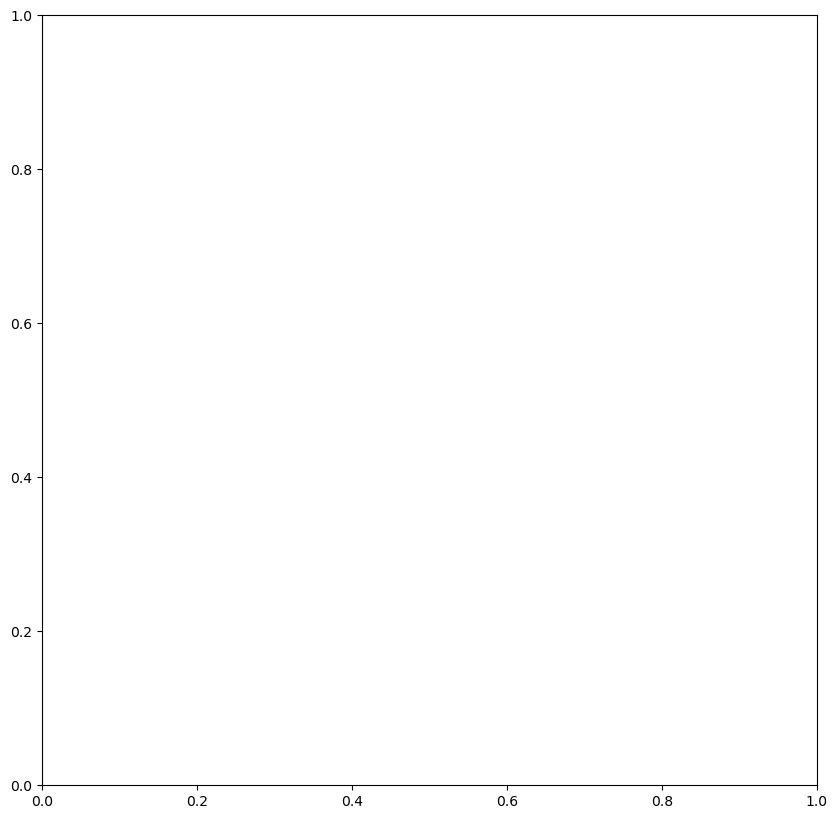

In [1351]:
import geopandas as gpd

# Define the colormap
cmap = ListedColormap(['red', 'green'])

# Plot the shapefile with colors based on the "is_in_ids" column
fig, ax = plt.subplots(figsize=(10, 10))
gb_shp.plot(ax=ax, column='is_in_ids', cmap=cmap, legend=True)

# Load the CAMELS GB shapefile
gb_shp = gpd.read_file(output_path)

# Add title and show the plot
ax.set_title('CAMELS GB Shapefile')
plt.show()

In [ ]:
mean_table = pd.read_excel('../Outputs/all/mean_SR_tables.xlsx', index_col=0)
mean_table

In [ ]:
decadal_mean_df=mean_table.reset_index()
decadal_df = pd.read_excel('../Outputs/all/SR_mean_with_change.xlsx', index_col=0)
decadal_df

In [ ]:
HC_df = pd.read_excel('../Outputs/all/catchments_HC_combined.xlsx', index_col=None)
HC_df

In [ ]:
gm_df = annual_lc.reset_index()
gm_df = gm_df.set_index(['dataset', 'catchment', 'image_date'])

def plot_mean_comparison(gm_df, ax, col, dataset, catchment):
# Compute rolling means
    geo_mean = gm_df.loc[dataset, catchment, :].rolling(window=10, min_periods=2).apply(lambda x: np.exp(np.log(x).mean()))[col]
    ar_mean = gm_df.loc[dataset, catchment, :].rolling(window=10, min_periods=2).mean()[col]

    # Plot results
    
    ax.plot(geo_mean.index, geo_mean, label=f'Geometric Mean {col}')
    ax.plot(ar_mean.index, ar_mean, label=f'Arithmetic Mean {col}')

    # Format plot
    ax.set_title(f'Rolling Mean Comparison', fontsize=16)
    ax.set_ylabel(' Proportion Upstram Area Above Critical Value', fontsize=12)
    ax.set_xlabel('year', fontsize=12)
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

    # Set golden ratio
    fig.set_size_inches(10, 6.18, forward=True)

    # plt.show()
fig, ax = plt.subplots(figsize=(10, 6.18))
plot_mean_comparison
plot_mean_comparison(gm_df, ax, 'ups_EVI_area_normalized', 'Meuse', 'La Meuse Goncourt')
plot_mean_comparison(gm_df, ax, 'ups_EVI_area_normalized', 'Meuse', 'La Meuse Stenay')

fig, ax = plt.subplots(figsize=(10, 6.18))
plot_mean_comparison(gm_df, ax, 'ups_TCW_area_normalized', 'Meuse', 'La Meuse Goncourt')
plot_mean_comparison(gm_df, ax, 'TCW_area_normalized', 'Meuse', 'La Meuse Stenay')

fig, ax = plt.subplots(figsize=(10, 6.18))
plot_mean_comparison(gm_df, ax, 'NDMI_area_normalized', 'Meuse', 'La Meuse Goncourt')
plot_mean_comparison(gm_df, ax, 'NDVI_area_normalized', 'Meuse', 'La Meuse Stenay')

fig, ax = plt.subplots(figsize=(10, 6.18))
plot_mean_comparison(gm_df, ax, 'NDVI_stdDev', 'Meuse', 'La Meuse Goncourt')
plot_mean_comparison(gm_df, ax,  'NBR_stdDev', 'Meuse', 'La Meuse Goncourt')

In [ ]:
merged_df = pd.read_excel('../Outputs/all/merge_HC_SR.xlsx', index_col=None)
merged_df

In [ ]:
# Define the dependent variables
dep_vars = ['AI_mean_diff_pct',
 'EI_mean_diff_pct',
 'Ep_mean_diff_pct',
 'Pa_mean_diff_pct',
 'SI_mean_diff_pct',
 'ST_mean_diff_pct',
 'Sr_mean_diff_pct',
 'T_mean_diff_pct',
 'is_dur_mean_diff_pct',]

# Define the independent variables
ind_vars = ['ups_EVI_area_normalized_change',
 'ups_GNDVI_area_normalized_change',
 'ups_NBR_area_normalized_change',
 # 'ups_NDFI_area_normalized_change',
 'ups_NDMI_area_normalized_change',
 # 'ups_NDSI_area_normalized_change',
 'ups_NDVI_area_normalized_change',
 'ups_TCA_area_normalized_change',
 'ups_TCB_area_normalized_change',
 'ups_TCG_area_normalized_change',
 'ups_TCW_area_normalized_change']

data_change = merged_df.iloc[:, :]

translate_col_name('ups_GNDVI_area_normalized_change')

def plot_collinearity(data, dep_vars, ind_vars, hue=None):
    
    data = data[dep_vars+ind_vars]
    
    sns.pairplot(
        data=data.rename(columns=translate_col_name),
        x_vars=[translate_col_name(var) for var in dep_vars],
        y_vars=[translate_col_name(var) for var in ind_vars],
        hue=hue
        
    )
colorby = 'dataset'  # Column name for coloring

# print(data_change.columns)  # Print column names for debugging
plot_collinearity(data_change, dep_vars, ind_vars, None)

In [1281]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd
df = JM_18.dropna(subset=['dy_res', 'r_1_normalized_change',  'h_1_normalized_change'])
#define response variable
y = df['dy_res']

#define predictor variables
x = df[['r_1_normalized_change', 'h_1_normalized_change']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()
print(model)

In [ ]:
merged_df.iloc[merged_df.EI_mean_diff_pct.idxmax()].EI_mean_diff_pct = np.nan

In [ ]:
data_mean = merged_df.iloc[:, :]
display(data_mean)

# Define the dependent variables
dep_vars = ['AI_mean_diff',
 'EI_mean_diff',
 'Ep_mean_diff',
 'Pa_mean_diff',
 'SI_mean_diff',
 'ST_mean_diff',
 'Sr_mean_diff',
 'T_mean_diff',
 'is_dur_mean_diff',]

ind_vars = [ 'ups_h_1_normalized_change',
            'ups_h_2_normalized_change',
            'ups_h_3_normalized_change',
            'ups_h_4_normalized_change',
            'ups_h_5_normalized_change',
            # 'ups_h_6_normalized_change',
            # 'ups_h_7_normalized_change',
           ]
            
plot_collinearity(data_mean, dep_vars, ind_vars, None)


In [ ]:
# Define the dependent variables
dep_vars = ['AI_change',
 'EI_change',
 'Ep_change',
 'Pa_change',
 'SI_change',
 'ST_change',
 'Sr_change',
 'T_change',
 'is_dur_change',
           ]
ind_vars = [ 'ups_c_1_normalized_change',
            'ups_c_2_normalized_change',
            'ups_c_3_normalized_change',
            'ups_c_4_normalized_change',
            'ups_c_5_normalized_change',
            # 'ups_h_6_normalized_change',
            # 'ups_h_7_normalized_change',
           ]
            
plot_collinearity(data_mean, dep_vars, ind_vars, None)

In [ ]:
# Define the dependent variables
dep_vars = ['AI_mean_diff_pct',
 'EI_mean_diff_pct',
 'Ep_mean_diff_pct',
 'Pa_mean_diff_pct',
 'SI_mean_diff_pct',
 'ST_mean_diff_pct',
 'Sr_mean_diff_pct',
 'T_mean_diff_pct',
 'is_dur_mean_diff_pct',]
ind_vars = [ 'ups_r_1_normalized_change',
            'ups_r_2_normalized_change',
            'ups_r_3_normalized_change',
            'ups_r_4_normalized_change',
            'ups_r_5_normalized_change',
            # 'ups_h_6_normalized_change',
            # 'ups_h_7_normalized_change',
           ]
            
plot_collinearity(data_mean, dep_vars, ind_vars, None)

In [1325]:
from scipy.stats import shapiro
# var = 'r_1_change'
def shapiro_vars(df,var):

    x = df[var]
    stat, p = shapiro(x.dropna())
    return stat

var_list = ['r_1_normalized_change', 'r_1_normalized_change', 'r_2_normalized_change', 'r_3_normalized_change']
dep_var_list = ['AI_mean_diff_pct',
 'EI_mean_diff_pct',
 'Ep_mean_diff_pct',
 'Pa_mean_diff_pct',
 'SI_mean_diff_pct',
 'ST_mean_diff_pct',
 'Sr_mean_diff_pct',
 'T_mean_diff_pct',
 'is_dur_mean_diff_pct',
'dy_res',
                'dy_clim'
               ]


for var in var_list:
    shapiro_vars(JM_18, var)

for var in dep_var_list:
    shapiro_vars(JM_18, var)

In [ ]:
# Define the dependent variables
dep_vars = ['AI_mean_diff_pct',
 'EI_mean_diff_pct',
 'Ep_mean_diff_pct',
 'Pa_mean_diff_pct',
 'SI_mean_diff_pct',
 'ST_mean_diff_pct',
 'Sr_mean_diff_pct',
 'T_mean_diff_pct',
 'is_dur_mean_diff_pct',]

# Define the independent variables
ind_vars = ['GNDVI_mean_change',
 # 'GNDVI_stdDev_change',
 'NBR_mean_change',
 # 'NBR_stdDev_change',
 'NDFI_mean_change',
 # 'NDFI_stdDev_change',
 'NDMI_mean_change',
 # 'NDMI_stdDev_change',
 'NDSI_mean_change',
 # 'NDSI_stdDev_change',
 'NDVI_mean_change',
 # 'NDVI_stdDev_change',
 'TCA_mean_change',
 # 'TCA_stdDev_change',
 'TCB_mean_change',
 # 'TCB_stdDev_change',
 'TCG_mean_change',
 # 'TCG_stdDev_change',
 'TCW_mean_change',
 # 'TCW_stdDev_change',
           ]

data = merged_df

def plot_collinearity(data, dep_vars, ind_vars, hue=None):
    
    # Create a pairplot with hue as the dependent variable
    sns.pairplot(data=data, x_vars=dep_vars, y_vars=ind_vars, hue=hue)

plot_collinearity(data, dep_vars, ind_vars, None)

In [ ]:
# Define the dependent variables
dep_vars = ['AI_change',
 'EI_change',
 'Ep_change',
 'Pa_change',
 'SI_change',
 'ST_change',
 'Sr_change',
 'T_change',
 'is_dur_change',]

# Define the independent variables
ind_vars = [
    # 'GNDVI_mean_change',
 'GNDVI_stdDev_change',
 # 'NBR_mean_change',
 'NBR_stdDev_change',
 # 'NDFI_mean_change',
 'NDFI_stdDev_change',
 # 'NDMI_mean_change',
 'NDMI_stdDev_change',
 # 'NDSI_mean_change',
 'NDSI_stdDev_change',
 # 'NDVI_mean_change',
 'NDVI_stdDev_change',
 # 'TCA_mean_change',
 'TCA_stdDev_change',
 # 'TCB_mean_change',
 'TCB_stdDev_change',
 # 'TCG_mean_change',
 'TCG_stdDev_change',
 # 'TCW_mean_change',
 'TCW_stdDev_change',
           ]

data =merged_df

def plot_collinearity(data, dep_vars, ind_vars, hue=None):
    
    # Create a pairplot with hue as the dependent variable
    sns.pairplot(data=data, x_vars=dep_vars, y_vars=ind_vars, hue=hue)

plot_collinearity(data, dep_vars, ind_vars, None)


In [ ]:
# Select only columns ending with '_change'
filtered_df = merged_df.filter(regex='_change$|_mean_diff$|_diff_pct$')

# Drop columns containing 'p10' or 'p90'
filtered_df = filtered_df.drop(columns=list(filtered_df.filter(regex='p10|p90').columns.values) +['tot_area_change'])


keys_to_drop = ['fscore1','fscore2','fscore3','fscore4','fscore5','c_accuracy1','c_accuracy2','c_accuracy3','c_accuracy4','c_accuracy5', 'accuracy']
df = filtered_df.loc[:, ~filtered_df.columns.str.contains('score')]
df = df.loc[:, ~df.columns.str.contains('accuracy')]
df = df.loc[:, ~df.columns.str.contains('kappa')]
df = df.loc[:, ~df.columns.str.contains('tot')]

def top_corr(df, dep_vars):
    # calculate the correlation matrix
    corr_matrix = df.corr()

    # create an empty dataframe to store the top correlations for each dependent variable
    top_corrs = pd.DataFrame(columns=['Dependent Variable', 'Independent Variable', 'Correlation Coefficient', 'R-squared', 'P-value', 'n'])

    # loop through each dependent variable
    for dep_var in dep_vars:
        # get the correlations for this dependent variable
        dep_var_corrs = corr_matrix.loc[dep_var]

        # sort the correlations in descending order
        sorted_corrs = np.abs(dep_var_corrs).sort_values(ascending=False)

        sorted_corrs = sorted_corrs[~sorted_corrs.index.isin(dep_vars)]

        # loop through the sorted correlations and add the top significant ones to the dataframe
        for i, (ind_var, corr_val) in enumerate(sorted_corrs.items()):
            if i >= 10:
                break

            if ind_var == dep_var or ind_var in dep_vars:
                continue

            try:
                xy = df[[ind_var, dep_var]].dropna()
                n = len(xy)

            except:
                continue

            if len(xy) > 28:
                # Calculate Pearson's correlation coefficient and its square (R-squared)
                r, p_value = pearsonr(xy[ind_var], xy[dep_var])
                r_squared = r ** 2

                top_corrs = pd.concat([top_corrs, pd.DataFrame({'Dependent Variable': [translate_col_name(dep_var)],
                                                                 'Independent Variable': [translate_col_name(ind_var)],
                                                                 'Correlation Coefficient': [corr_val],
                                                                 'R-squared': [r_squared],
                                                                 'P-value': [p_value],
                                                                 'n': [n]})], ignore_index=True)
            else:
                continue

    # sort the dataframe by the correlation coefficient in descending order
    top_corrs = top_corrs.sort_values(by='Correlation Coefficient', ascending=False)

    display(top_corrs)

    # display the top correlations for each dependent variable
    for dep_var in [translate_col_name(dep_var) for dep_var in dep_vars]:
        print(f"Top correlations for {dep_var}:")
        display(top_corrs[top_corrs['Dependent Variable'] == dep_var].loc[top_corrs['Independent Variable'] != dep_var])
        print("\n")
    return top_corrs

dep_vars = ['AI_change','EI_change','Ep_change','Pa_change','SI_change','ST_change','Sr_change','T_change','is_dur_change',
           'AI_mean_diff','EI_mean_diff','Ep_mean_diff','Pa_mean_diff','SI_mean_diff','ST_mean_diff','Sr_mean_diff','T_mean_diff','is_dur_mean_diff', 'omega_mean_diff',
            'AI_mean_diff_pct','EI_mean_diff_pct','Ep_mean_diff_pct','Pa_mean_diff_pct','SI_mean_diff_pct','ST_mean_diff_pct','Sr_mean_diff_pct','T_mean_diff_pct','is_dur_mean_diff_pct', 'omega_mean_diff_pct']
top_corrs = top_corr(df, dep_vars)
top_corrs.to_excel('../Outputs/results/ranked_correlation.xlsx')

In [ ]:
merged.loc[merged.catchment==8009, ['image_date', 'catchment', 'h_1', 'h_1_change', 'AI_mean', 'AI_mean_diff', 'AI_change']]

In [1411]:
def get_unit_of_measurement(s):
    if 'area' in s:
        return '[$Km^2$]'
    elif 'Evaporative' in s:
        return '[$-/decade$]'
    elif 'normalized' in s:
        return '[$-/decade$]'
    elif 'Potential Evaporation' in s:
        return '[$mm/decade$]'
    elif 'Precipitation' in s:
        return '[$mm$]'
    elif 'T' in s:
        return '[$^o^C$]'
    elif 'Root-zone' in s:
        return '[$mm$]'
    else:
        return ''
    


def scatter_vars2(df, x, y, is_reflectance):
    # Filter out rows with missing values
    
    mask = (~df[x].isnull()) & (~df[y].isnull())
    
    data = df.loc[mask, [x, y]]
    
    data = data[data[x] < 2]
    
    if is_reflectance == True:
        # Calculate correlation coefficient
        r, pval = pearsonr(data[x].values, data[y].values/1000)
        # Create joint plot with regression line
        data[y] = data[y]/1000
        g = sns.jointplot(x=x, y=y, data=data)
    else:
        # Calculate correlation coefficient
        r, pval = pearsonr(data[x].values, data[y].values)
        # Create joint plot with regression line
        g = sns.jointplot(x=x, y=y, data=data)
    
    g.fig.suptitle(f'Joint Plot\n{translate_col_name(x)} vs {translate_col_name(y)}', y=1.2, fontsize=15)
    g.set_axis_labels(f'{translate_col_name(x)} {get_unit_of_measurement(x)}', f'{translate_col_name(y)} {get_unit_of_measurement(y)}')
    
    # Calculate adjusted R-squared
    n = len(data)
    p = 1  # Assuming only one independent variable (change if necessary)
    df = n - p - 1
    rsq = r ** 2
    adj_rsquared = 1 - ((1 - rsq) * (n - 1)) / (n - p - 1)
    
    # Add legend outside of the plot
    legend_text = f'Pearson $p$ = {pval:.2e}\n$r^2$: {rsq:.2f}\nSample Size: {n}'
    
    g.ax_joint.legend([legend_text], loc='center left', bbox_to_anchor=(1.1, 0.85), frameon=False)
    
    x1 = [data[x].min(), data[x].max()]
    
    # Add a 1:1 line
    g.ax_joint.plot(x1, (data[y].min(),data[y].max()) , color='gray', linestyle='--', label='1:1 Line')

    # Add the regression line equation
    slope, intercept = np.polyfit(data[x], data[y], deg=1)
    x2 = np.linspace(x1[0], x1[1], 1000)
    y = slope*x2+intercept
    g.ax_joint.plot(x2, y)
    equation_text = f'y = ${slope:.2f}x + {intercept:.3f}$'
    g.ax_joint.text(0.05, 0.95, equation_text, transform=g.ax_joint.transAxes, fontsize=12)
 
    # Adjust the title and labels

    plt.show()
    
def scatter_vars3(df, x, y, is_reflectance, slope, intercept):
    # Filter out rows with missing values
    mask = (~df[x].isnull()) & (~df[y].isnull())
    
    data = df.loc[mask, [x, y]]
    
    if is_reflectance == True:
        # Calculate correlation coefficient
        r, pval = pearsonr(data[x].values, data[y].values/1000)
        # Create joint plot with regression line
        data[y] = data[y]/1000
        g = sns.jointplot(x=x, y=y, data=data)
    else:
        # Calculate correlation coefficient
        r, pval = pearsonr(data[x].values, data[y].values)
        # Create joint plot with regression line
        g = sns.jointplot(x=x, y=y, data=data)
    
    g.fig.suptitle(f'Joint Plot\n{translate_col_name(x)} vs {translate_col_name(y)}', y=1.05, fontsize=15)
    g.set_axis_labels(f'{translate_col_name(x)} {get_unit_of_measurement(x)}', f'{translate_col_name(y)} {get_unit_of_measurement(y)}')
    
    # Calculate adjusted R-squared
    n = len(data)
    p = 1  # Assuming only one independent variable (change if necessary)
    df = n - p - 1
    rsq = r ** 2
    adj_rsquared = 1 - ((1 - rsq) * (n - 1)) / (n - p - 1)
    
    # Add legend outside of the plot
    legend_text = f'Pearson $p$ = {pval:.2e}\n$r^2$: {rsq:.2f}\nSample Size: {n}'
    
    g.ax_joint.legend([legend_text], loc='center left', bbox_to_anchor=(1.1, 0.85), frameon=False)
    
    x1 = [data[x].min(), data[x].max()]
    
    # Add a 1:1 line
    g.ax_joint.plot(x1, (data[y].min(),data[y].max()) , color='gray', linestyle='--', label='1:1 Line')

    # Add the regression line equation
    # slope, intercept = np.polyfit(data[x], data[y], deg=1)
    x2 = np.linspace(x1[0], x1[1], 1000)
    y = slope*x2+intercept
    g.ax_joint.plot(x2, y, c='r')
    equation_text = f'y = ${slope:.2f}x + {intercept:.3f}$'
    g.ax_joint.text(0.05, 0.95, equation_text, transform=g.ax_joint.transAxes, fontsize=12)
 
    # Adjust the title and labels

    plt.show()



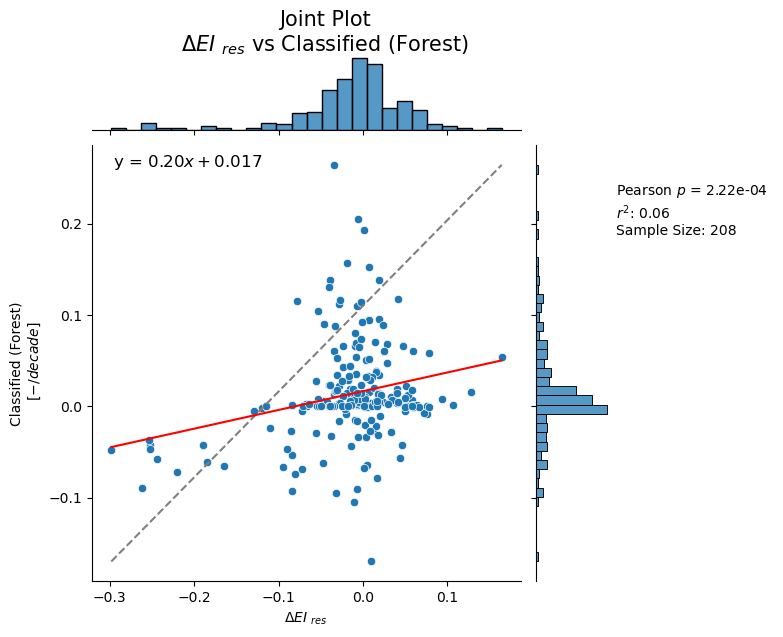

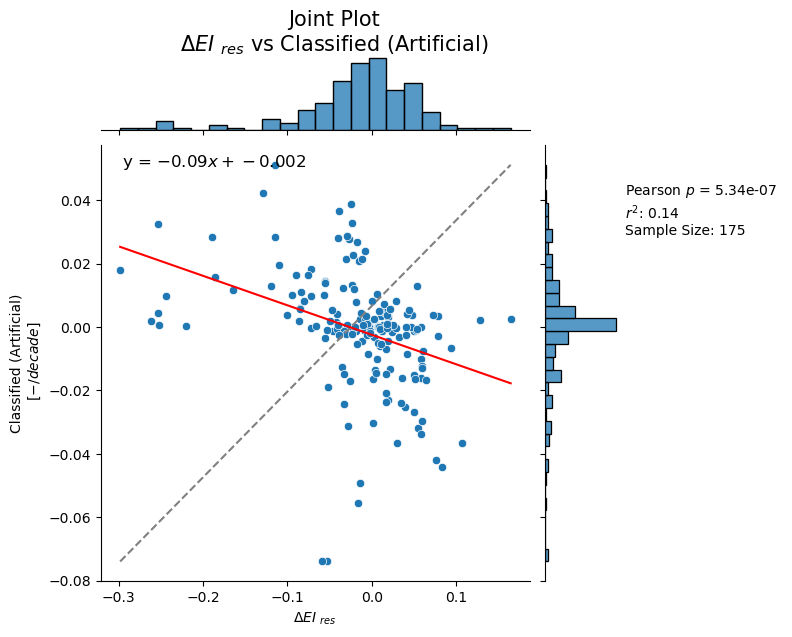

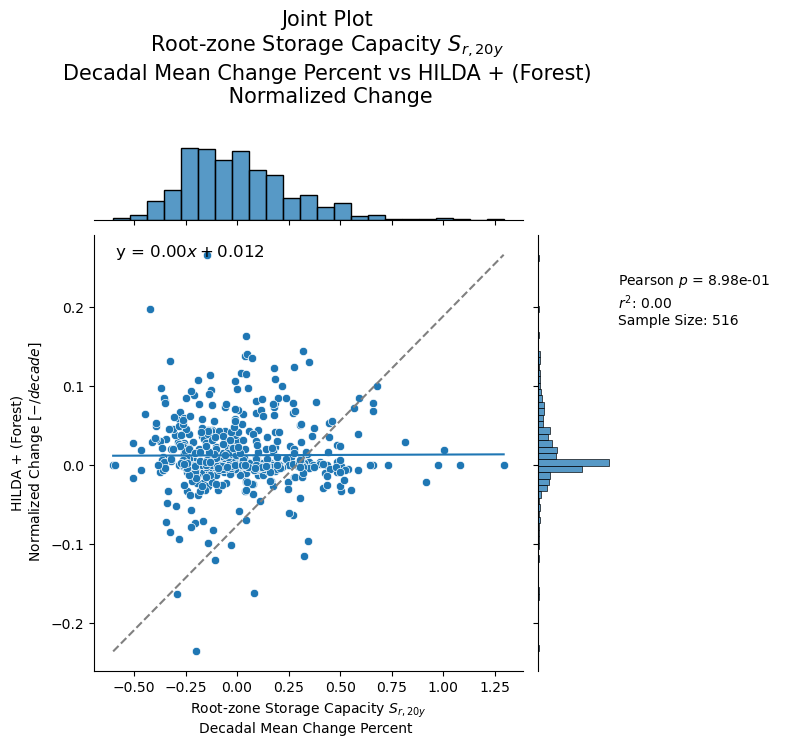

In [1413]:
scatter_vars3(JM_18, 'dy_res', 'r_3_normalized_change', False, 0.205, 0.01653)
scatter_vars3(JM_18, 'dy_res', 'r_1_normalized_change', False, -0.093, -0.00248)
scatter_vars2(JM_18, 'Sr_mean_diff_pct', 'h_4_normalized_change', False)
# scatter_vars2(JM_18, 'dy_res', 'h_3_normalized_change')
# # scatter_vars2(JM_18, 'dy_res', 'h_99_normalized_change')
# scatter_vars2(JM_18, 'dy_clim', 'r_1_normalized_change')
# scatter_vars2(JM_18, 'dy_clim', 'r_3_normalized_change')

In [ ]:
print(len(JM_18.catchment[JM_18.country_x=='BE'].drop_duplicates()))
print(len(JM_18.catchment[JM_18.country_x=='FR'].drop_duplicates()))

In [ ]:
AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

labels=[f'{float(AI_levels[0])}-{float(AI_levels[1])}',
         f'{float(AI_levels[1])}-{float(AI_levels[2])}',
         f'{float(AI_levels[2])}-{float(AI_levels[3])}',
         f'{float(AI_levels[3])}-{float(AI_levels[4])}',
         f'{float(AI_levels[4])}-{float(AI_levels[5])}',
         f'{float(AI_levels[5])}-{float(AI_levels[6])}',
         f'{float(AI_levels[6])}-{float(AI_levels[7])}',
         f'{float(AI_levels[7])}-{float(AI_levels[8])}',
         f'{float(AI_levels[8])}-{float(AI_levels[9])}',]

AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

aridity_table_SR = merged_df.set_index('system_index').sort_values('LT_AI')
aridity_table_SR['AI_group_narrow'] = pd.cut(aridity_table_SR['LT_AI'], AI_levels, labels=labels, ordered=True)

grouped_SR = aridity_table_SR.groupby('AI_group_narrow')
colors9 = ['#FFFFFF','#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034', '#222222', '#222222', '#222222']
palette_9 = sns.color_palette(colors9)
dist = []

for group, indices in grouped_SR.indices.items():
    
    print(f"Group: {group}, indice: {len(indices)}")
    dist.append(len(indices))

colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034']

#222222
fig = plt.figure(figsize=(7, 7))
sns.histplot(aridity_table_SR.LT_AI, bins=AI_levels, palette=palette_9)
plt.xticks(AI_levels)
plt.xlabel('Long Term Aridity Index Brackets')
plt.grid()
plt.title('Distribution of HC and SR Data Pairs for Decadal Analysis');

In [ ]:
import scipy.stats as stats

def distribution_pairs(grouped_df: pd.DataFrame, top_row: str, tr_label: str, bottom_row: str, br_label: str, suptitle: str):
    fig, ax = plt.subplots(2, 5, figsize=(30, 13))
    fig.text(0.5, 0.95, suptitle, fontsize=18, ha='center', va='top')  # Adjust the y parameter to change the vertical position of the suptitle
    n = []
    index = np.arange(0, 6)

    for i, (group, data) in enumerate(grouped_df):
        lim = np.max(np.abs(data.loc[:, top_row]))

        if len(data) > 0 and lim < 1 and i < 5:
            x1 = data.loc[:, top_row]
            sns.histplot(y=x1.values, ax=ax[0, i], color=colors5[i], orientation='horizontal', kde=True)
            # sns.kdeplot(y=x1.values, ax=ax[0, i], color='black', lw=2)
            mu = np.mean(x1)
            p10 = np.nanpercentile(x1.values, 10)
            p90 = np.nanpercentile(x1.values, 90)
            skew = stats.skew(x1, nan_policy='omit')
            
            ax[0, i].set_ylabel(tr_label)
            ax[0, i].set_title(f'AI {group} \n (n={len(x1.dropna())})')
            ax[0, i].axhline(mu, c='r', label=f'$\mu$: {mu:.3f}')
            ax[0, i].axhline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
            ax[0, i].axhline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
            ax[0, i].set_xlim(0, 70)
            ax[0, i].grid()
            ax[0, i].legend(loc='upper right', title=f'Skewness: {skew:.2f}')

        if len(data) > 0 and lim < 1 and i < 5:
            x1 = data.loc[:, bottom_row]
            sns.histplot(x=x1.values, ax=ax[1, i], color=colors5[i], kde=True)
            # sns.kdeplot(x=x1.values, ax=ax[1, i], color='black', lw=2)
            mu = np.mean(x1)
            p10 = np.nanpercentile(x1.values, 10)
            p90 = np.nanpercentile(x1.values, 90)
            skew = stats.skew(x1, nan_policy='omit')
            
            ax[1, i].set_xlabel(br_label)
            ax[1, i].axvline(mu, c='r', label=f'$\mu$: {mu:.3f}')
            ax[1, i].axvline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
            ax[1, i].axvline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
            ax[1, i].set_ylim(0, 70)
            ax[1, i].grid()
            ax[1, i].legend(loc='upper left', title=f'Skewness: {skew:.2f}')



In [ ]:
distribution_pairs(grouped_SR, 'EI_mean', 'Evaporative Index [$EI$]', 'AI_mean', 'Aridity Index [$AI$]', 'Distribution of Evaporative Index and Aridity Per Aridity Class')

In [ ]:
distribution_pairs(grouped_SR, 'EI_change', 'Evaporative Index [$EI$]', 'AI_change', 'Aridity Index [$AI$]', 'Distribution of Evaporative Index and Aridity Decadal Changes Per Aridity Class')

In [ ]:
def plot_one_hist(df, top_row, tr_label, hor):
    fig, axs = plt.subplots(1,1)
    x1 = df.loc[:, top_row]
    sns.histplot(x=x1.values if hor=='vertical' else None, y=x1.values if hor=='horizontal' else None, ax=axs, kde=True, color='blue')

    mu = np.mean(x1)
    p10 = np.nanpercentile(x1.values, 10)
    p90 = np.nanpercentile(x1.values, 90)
    skew = stats.skew(x1, nan_policy='omit')

    axs.set_ylabel(tr_label if hor=='horizontal' else None)
    axs.set_xlabel(tr_label if hor=='vertical' else None)
    axs.set_title(f'All Data \n (n={len(x1.dropna())})')
    if hor == 'vertical':
        axs.axvline(mu, c='r', label=f'$\mu$: {mu:.3f}')
        axs.axvline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
        axs.axvline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
    else: # hor == 'horizontal'
        axs.axhline(mu, c='r', label=f'$\mu$: {mu:.3f}')
        axs.axhline(p90, c='r', ls='--', label=f'$p0.9$: {p90:.3f}')
        axs.axhline(p10, c='r', ls='--', label=f'$p0.1$: {p10:.3f}')
    # axs.set_xlim(0, 100)
    axs.grid()
    axs.legend(loc='upper right', title=f'Skewness: {skew:.2f}')

top_row = 'EI_change'
tr_label = '$\Delta$ EI'
plot_one_hist(merged_df, top_row, tr_label, 'horizontal')

top_row = 'AI_change'
tr_label = '$\Delta$ AI'
plot_one_hist(merged_df, top_row, tr_label, 'vertical')



In [ ]:
merged.loc[merged.catchment==8009, ['image_date', 'catchment', 'h_1', 'h_1_change', 'AI_mean', 'AI_mean_diff', 'AI_change']]

In [ ]:
def w_function(AI, w):
    EI = 1 + AI - (1 + (AI**w))**(1/w)
    return EI

plt.figure(99)

def many_w_curves(grouped):
    for i, (group, indices) in enumerate(grouped):
        ls_EI = []
        ls_AI = []
        if i <=4:
            AI = np.linspace(AI_levels[i], AI_levels[i+1], 150)
            w = grouped.mean()['omega_mean'][i]
            EI_curve = w_function(AI, w)
            plt.plot(AI, EI_curve, linewidth=2, c=colors5[i], label=f'mean $\omega$ ={w:.3f}, AI: {group}')
            ls_EI.append(EI_curve)
            ls_AI.append(AI)
         
        else:
            break
    return [ls_EI, ls_AI]


def budyko_aridity(df, grouped):

    budyko_curve_x = np.arange(1, 2, 0.05)
    energy_limit_x = np.arange(0, 1.0001, 0.05)
    x = np.arange(0, 1.0001, 0.05)
    water_limit_y = 1 + budyko_curve_x*0
    energy_limit_y = energy_limit_x
    y = 1 + x*0

    levels = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

    fig, ax = plt.subplots(1, constrained_layout=True, figsize=(10,8))

    plt.ylabel(f"Evaporative Index ($E_a/P$) [-]")
    plt.xlabel(f"Aridity Index ($E_P/P$) [-]")

    plt.ylim(0, 1.2)

    plt.plot(energy_limit_x, energy_limit_y, c='k')
    plt.plot(budyko_curve_x, water_limit_y,c='k')
    plt.plot()

    plt.yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]);


    ls_EI, ls_AI = many_w_curves(grouped)

    combo = df.drop_duplicates(subset='system_index', keep='first')

    for i in range(len(colors5)):
        mask = (combo['LT_AI'] >= AI_levels[i]) & (combo['LT_AI'] <= AI_levels[i+1])
        masked = combo[mask]
        scatter1 = ax.scatter(masked.LT_AI, masked.LT_EI, c = colors5[i], label=f'Catchment AI {list(grouped.groups.keys())[i]}, n={len(list(grouped.groups.values())[i])}', marker='+')

    for i, level in enumerate(levels[1:6]):
        plt.axvline(level, ymax=1, linestyle='dashed', color=colors5[i])


    #cbar.set_ticks(AI_levels)
    #cbar.set_ticklabels(colors9)

    plt.title('Dataset Grouped by Aridity Index')
    plt.xlim(0,1.2)

    plt.legend()

budyko_aridity(merged_df, grouped_SR)

In [ ]:
w_slope_rad = []

for i, (group, data) in enumerate(grouped_SR):
    w = data['omega_mean'].mean()
    x0 = AI_levels[i]
    x1 = AI_levels[i+1]
    x = np.linspace(x0, x1, 100)
    y = w_function(x, w)
    slope, intercept, r, p, se = linregress(x, y)
    print(slope)
    
    slope_radians = np.arctan(slope)
    w_slope_rad.append(slope_radians)
    
    plt.plot(x, y, linewidth=5, label='curve of the mean omega')
    plt.plot(x, slope*x + intercept, linestyle='dashed', label=f'Regression line, se = {se:.5f}')

    if i == 4:
        break

plt.legend(bbox_to_anchor=(1,1))

print(w_slope_rad)

- North (upwards, 0 degrees) corresponds to a positive change in the Y direction and no change in the X direction.
- East (rightwards, 90 degrees) corresponds to a positive change in the X direction and no change in the Y direction.
- South (downwards, 180 degrees) corresponds to a negative change in the Y direction and no change in the X direction.
- West (leftwards, 270 degrees) corresponds to a negative change in the X direction and no change in the Y direction.

In [ ]:
df = pd.read_excel('../Outputs/all/old_d_combo.xlsx')

# Get the angle and magnitude of each data point
angles = np.arctan2(df['d_EI'], df['d_AI'])
magnitudes = np.sqrt(df['d_AI']**2 + df['d_EI']**2)


# Create bins for the angles
bins = np.linspace(-np.pi, np.pi, num=36)

# Create a histogram of the angles
hist, _ = np.histogram(angles, bins=bins, weights=magnitudes)

# Plot the rose diagram
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(20, 10))
ax.bar(bins[:-1], hist, width=2*np.pi/36, align='edge', bottom=0)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title(f"Polar plot of x: $\Delta AI$, vs y: $\Delta EI$, n={len(df)}")
plt.show()

display(df.loc[df.catchment_name == 'La Bar Cheveuges ', ['catchment_name', 'decade_ending', 'd_EI', 'd_AI']])
print(df.keys())
# Plot histogram
sns.histplot(data=df, x='d_EI', bins=10)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('d_EI')
plt.ylabel('Frequency')
plt.title('Histogram of d_EI')

# Display the plot
plt.show()

sns.histplot(data=df, x='d_AI', bins=10)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('d_AI')
plt.ylabel('Frequency')
plt.title('Histogram of d_EI')

# Display the plot
plt.show()

In [ ]:
df = merged_df

# Calculate angles and wrap around if necessary
angles = np.arctan2(df['EI_change'], df['AI_change']) + np.pi/2
angles = np.where(angles > np.pi, angles - 2*np.pi, angles)

# Calculate the magnitudes of changes
magnitudes = np.sqrt(df['AI_change']**2 + df['EI_change']**2)

# Create bins for the angles
bins = np.linspace(-np.pi, np.pi, num=36)

# Create the figure and subplots
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='polar')
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the polar plot on the first subplot
hist, _ = np.histogram(angles, bins=bins)
ax1.bar(bins[:-1], hist, width=2*np.pi/36, align='edge', bottom=0)
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(f"Polar plot of x: $\Delta AI$, vs y: $\Delta EI$, n={len(df)}")

# Plot the histogram of angles on the second subplot
ax2.hist(angles, bins=36, edgecolor='black', color='blue')
ax2.set_xlabel('Angles')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Angles')

# Plot the weighted histogram on the third subplot
ax3.hist(angles, bins=36, weights=magnitudes, edgecolor='black', color='green')
ax3.set_xlabel('Angles')
ax3.set_ylabel('Weighted Frequency')
ax3.set_title('Weighted Histogram of Angles')

plt.tight_layout()
plt.show()


# Jaramillo 2018

In [ ]:
import matplotlib.ticker as ticker

def format_pi(value, _):
    frac = value / np.pi
    if frac == 0:
        return '0'
    elif frac == 1:
        return '$\pi$'
    else:
        return f'${frac:.2f}\pi$'

def estimate_y(x, w):
    x= np.linspace(x*0.97, x*1.03,100)
    y = w_function(x, w)
    slope, intercept, r, p, se = linregress(x, y)
    return slope

def JM_18_calc(dataframe, groupby):  
    
    grouped = dataframe.groupby('catchment')
    
    new_df = pd.DataFrame()
    
    for catch, df in grouped:
        # print(catch)
        x1 = df.AI_mean.shift()
        x2 = df.AI_mean   #holding omega constant
        x = df.AI_change
        
        df['dx'] = x2-x1
        df['b'] = np.where(df['AI_change'] > 0, 90, np.where(df['AI_change'].isna(), np.nan, 270))
        df['LT_omega'] = df.omega_mean.mean()
        df['y_clim_x1'] = w_function(x1, df.LT_omega)
        df['y_clim_x2'] = w_function(x2, df.LT_omega)
        df['dy_clim'] = df.y_clim_x2 - df.y_clim_x1
        
        clim_angle = np.radians(df.b) - np.arctan(df.dy_clim / df.AI_change)
        df['theta_clim'] = np.where(clim_angle > np.pi, clim_angle - 2*np.pi, clim_angle)
        
        df['r_clim'] = np.sqrt(df.dy_clim**2 + x**2)
        
        RP_angle = np.radians(df.b) - np.arctan(df.EI_change / df.AI_change)
        df['theta_RP'] = np.where(RP_angle > np.pi, RP_angle - 2*np.pi, RP_angle)
        df['r_RP'] = np.sqrt(df.EI_change**2 + x**2)
        df['dy_res'] = df.EI_change - df.dy_clim
        df['r_res'] = np.sqrt(df.dy_res**2 + x**2)
        # display(df[['catchment','image_date', 'theta_clim', 'theta_RP',  'r_clim', 'dy_clim', 'dy_res', 'r_RP', 'r_clim']])
        # break
        new_df = pd.concat([new_df, df])
        
    

    new_df['slope_rad'] = df.apply(lambda row: np.arctan(estimate_y(row['AI_mean'], row['omega_mean'])), axis=1)

    return new_df


    # plt.hist(df.AI_change)
JM_18 = JM_18_calc(merged_df, 'catchment')
display(JM_18[['image_date', 'dx', 'catchment', 'b', 'dy_res', ]])
JM_18.to_excel('../Outputs/results/All_Data_With_Residuals.xlsx', index=None)

In [ ]:
JM_18.r_res

In [1291]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from scipy.stats import t

In [1222]:
len(JM_18.catchment.drop_duplicates().values)

286

In [1327]:
def bootstrap_regression(df, explanatory_vars, response_var, n_iterations, group):
    df_new = pd.DataFrame()
    
    for var in explanatory_vars:
        # print(var)
        df_ = df.copy()
        
        if len(df_.dropna(subset=[response_var, var])) <= 4:
            print(var, len(y))
            # Skip regression if filtered data length is not sufficient
            result = {
                'Explanatory': var,
                'Response Var': response_var,
                'Slope Mean': np.nan,
                'Slope Lower Bound': np.nan,
                'Slope Upper Bound': np.nan,
                'Intercept Mean': np.nan,
                'Intercept Lower Bound': np.nan,
                'Intercept Upper Bound': np.nan,
                'R-squared Mean': np.nan,
                'R-squared Lower Bound': np.nan,
                'R-squared Upper Bound': np.nan,
                'P-values': np.nan  # Add a new column for p-values
            }
            df_new = pd.concat([df_new, pd.DataFrame(result, index=[0])])
        else:
            df_ = df_.dropna(subset=[response_var, var])
            X = df_[response_var].values
            y = df_[var].values
            coefs = []
            intercepts = []
            r_squareds = []
            p_values = []  # Store p-values for each resample
            
            
            for _ in range(n_iterations):
                # Create a bootstrap sample
                X_boot, y_boot = resample(X, y)

                # Fit the linear regression model
                model = LinearRegression()
                model.fit(X_boot.reshape(-1, 1), y_boot)

                # Get the slope, intercept, and R-squared values of the fitted model
                coef = model.coef_[0]
                intercept = model.intercept_
                r_squared = model.score(X_boot.reshape(-1, 1), y_boot)
                
                # Compute p-values
                X1 = np.column_stack((np.ones(len(y_boot)), X_boot))
                sigma_hat = np.sqrt(np.sum(np.square(y_boot - X1 @ [intercept, coef])) / (len(y_boot) - X1.shape[1]))
                beta_cov = np.linalg.inv(X1.T @ X1)
                t_vals = [intercept, coef] / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
                p_vals = t.sf(np.abs(t_vals), len(y_boot) - X1.shape[1]) * 2
                p_values.append(p_vals[0])

                coefs.append(coef)
                intercepts.append(intercept)
                r_squareds.append(r_squared)
            
            # print(coefs)
            # print(p_values)
            
            coef_lower_bound = np.percentile(coefs, 2.5, axis=0)
            coef_upper_bound = np.percentile(coefs, 97.5, axis=0)
            coef_mean = np.mean(coefs)

            intercept_lower_bound = np.percentile(intercepts, 2.5, axis=0)
            intercept_upper_bound = np.percentile(intercepts, 97.5, axis=0)
            intercept_mean = np.mean(intercepts)

            r_squared_lower_bound = np.percentile(r_squareds, 2.5, axis=0)
            r_squared_upper_bound = np.percentile(r_squareds, 97.5, axis=0)
            r_squared_mean = np.mean(r_squareds)
            
            p_lower_bound = np.percentile(p_values, 2.5, axis=0)
            p_upper_bound = np.percentile(p_values, 97.5, axis=0)
            p_mean = np.mean(p_values)

            result = {
                'Explanatory': translate_col_name(var),
                'n':len(df_),
                'SW_exp':shapiro_vars(df_, var),
                'SW_resp':shapiro_vars(df_, response_var),
                'Response Var': response_var,
                'Slope Mean': coef_mean,
                'Slope Lower Bound': coef_lower_bound,
                'Slope Upper Bound': coef_upper_bound,
                'Intercept Mean': intercept_mean,
                'Intercept Lower Bound': intercept_lower_bound,
                'Intercept Upper Bound': intercept_upper_bound,
                'R-squared Mean': r_squared_mean,
                'R-squared Lower Bound': r_squared_lower_bound,
                'R-squared Upper Bound': r_squared_upper_bound,
                'p Mean': p_mean,
                'p Lower Bound': p_lower_bound,
                'p Upper Bound': p_upper_bound,
            }

            df_new = pd.concat([df_new, pd.DataFrame(result, index=[0])])
    
    results = df_new
    results.to_excel(f'../Outputs/Results/bootstrapReg_{response_var}_{group}.xlsx')
    return results
ind_vars = ['h_1_normalized_change', 'h_2_normalized_change', 'h_3_normalized_change', 'h_4_normalized_change', 'h_5_normalized_change', 'h_6_normalized_change',
            'ups_h_1_normalized_change', 'ups_h_2_normalized_change', 'ups_h_3_normalized_change', 'ups_h_4_normalized_change', 'ups_h_5_normalized_change', 'ups_h_6_normalized_change',
            'c_1_normalized_change', 'c_2_normalized_change', 'c_3_normalized_change',  'c_5_normalized_change',
            'r_1_normalized_change', 'r_2_normalized_change', 'r_3_normalized_change', 'r_5_normalized_change', 'r_6_normalized_change',
            # 'ups_r_1_normalized_change', 'ups_r_2_normalized_change', 'ups_r_3_normalized_change', 'ups_r_5_normalized_change', 'ups_r_6_normalized_change', 
           'AI_mean_diff_pct','EI_mean_diff_pct','Ep_mean_diff_pct','Pa_mean_diff_pct','SI_mean_diff_pct','ST_mean_diff_pct','Sr_mean_diff_pct','T_mean_diff_pct','is_dur_mean_diff_pct', 'omega_mean_diff_pct']
            


result_df = bootstrap_regression(JM_18,ind_vars, 'dy_clim', 1000, 'all')
display(result_df)

c_4_normalized_change 22


,Explanatory,n,SW_exp,SW_resp,Response Var,Slope Mean,Slope Lower Bound,Slope Upper Bound,Intercept Mean,Intercept Lower Bound,Intercept Upper Bound,R-squared Mean,R-squared Lower Bound,R-squared Upper Bound,p Mean,p Lower Bound,p Upper Bound,P-values
0,HILDA + (Artificial)\n Normalized Change,333.0,0.613691,0.832948,dy_res,-0.025920,-0.046701,-0.006239,0.008716,0.007074,0.010481,0.012234,0.000627,0.034327,6.525323e-19,8.454106e-27,2.314082e-18,NaN
0,HILDA + (Cropland)\n Normalized Change,432.0,0.876871,0.873842,dy_res,-0.170261,-0.244472,-0.095384,-0.015405,-0.020922,-0.009821,0.028545,0.008710,0.053469,4.903152e-05,7.352333e-13,2.743499e-04,NaN
0,HILDA + (Pasture/Rangeland)\n Normalized Change,494.0,0.871178,0.850014,dy_res,0.027177,-0.058549,0.109249,-0.007333,-0.011612,-0.002980,0.002858,0.000002,0.013878,2.305471e-02,1.768829e-06,1.955736e-01,NaN
0,HILDA + (Forest)\n Normalized Change,518.0,0.874813,0.868177,dy_res,0.105755,0.058414,0.159305,0.011133,0.007495,0.014833,0.019141,0.005544,0.038049,6.107853e-05,3.707691e-14,1.606699e-04,NaN
0,HILDA + (Grass/Shrubland)\n Normalized Change,356.0,0.682981,0.795708,dy_res,-0.004111,-0.080027,0.057784,0.000686,-0.002843,0.005011,0.002443,0.000003,0.011053,4.716077e-01,3.105603e-02,9.680062e-01,NaN
0,HILDA + (Sparse/No vegetation)\n Normalized Ch...,654.0,0.056251,0.891060,dy_res,0.002394,-0.001730,0.009312,0.000134,-0.000020,0.000350,0.003135,0.000022,0.010238,2.630218e-01,1.579560e-02,8.124609e-01,NaN
0,Upstream\n HILDA + (Artificial)\n Normalized C...,333.0,0.613289,0.832948,dy_res,-0.025460,-0.046180,-0.005596,0.008740,0.007190,0.010429,0.012083,0.000462,0.037406,2.085797e-18,2.761280e-27,1.791098e-18,NaN
0,Upstream\n HILDA + (Cropland)\n Normalized Change,432.0,0.877835,0.873842,dy_res,-0.171577,-0.246985,-0.103194,-0.015285,-0.020815,-0.010303,0.028710,0.009647,0.054903,3.434170e-05,1.370395e-12,1.375007e-04,NaN
0,Upstream\n HILDA + (Pasture/Rangeland)\n Norma...,494.0,0.872674,0.850014,dy_res,0.032680,-0.049069,0.118433,-0.007572,-0.012053,-0.003553,0.003254,0.000003,0.016467,1.679387e-02,1.049222e-06,1.359344e-01,NaN
0,Upstream\n HILDA + (Forest)\n Normalized Change,518.0,0.875045,0.868177,dy_res,0.104103,0.053164,0.162617,0.011043,0.006994,0.014777,0.018712,0.005039,0.037525,9.768894e-05,3.355803e-14,3.007818e-04,NaN


(-1.0, 1000.0)

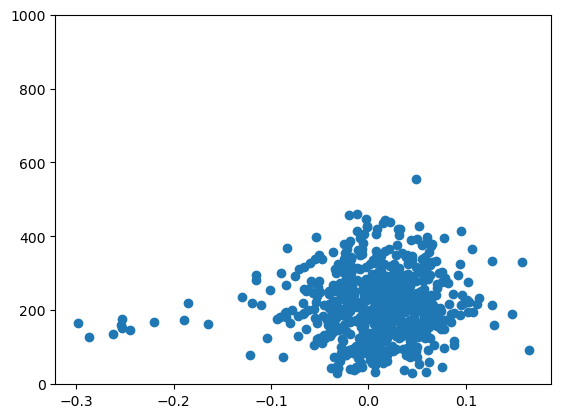

In [1308]:
a[a['p Mean']<0.01].sort_values('R-squared Mean', True)

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\3185559182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  a[a['p Mean']<0.01].sort_values('R-squared Mean', True)


KeyError: 'R-squared Mean'

In [1221]:
HC_keys = ['AI_change','EI_change','Ep_change','Pa_change','SI_change','ST_change','Sr_change','T_change','is_dur_change',]

result_df = bootstrap_regression(JM_18,HC_keys, 'dy_res', 1000, 'all')
result_df

,Explanatory,Response Var,Slope Mean,Slope Lower Bound,Slope Upper Bound,Intercept Mean,Intercept Lower Bound,Intercept Upper Bound,R-squared Mean,R-squared Lower Bound,R-squared Upper Bound
0,AI_change,dy_res,-0.651663,-0.746514,-0.554743,0.000132,-0.003688,0.004113,0.318333,0.247022,0.387187
0,EI_change,dy_res,0.618979,0.573441,0.677176,0.000413,-0.001596,0.002342,0.652384,0.581245,0.709770
0,Ep_change,dy_res,-37.437753,-53.039731,-24.345155,-0.944500,-1.668074,-0.233684,0.040506,0.019586,0.067157
0,Pa_change,dy_res,659.046353,538.706553,785.276875,-5.543010,-10.340106,-0.162787,0.224447,0.152821,0.297080
0,SI_change,dy_res,-0.139051,-0.194896,-0.088385,0.001117,-0.002152,0.004201,0.026763,0.009915,0.047105
0,ST_change,dy_res,-0.070535,-0.204763,0.057546,0.024289,0.016879,0.032231,0.002576,0.000004,0.011574
0,Sr_change,dy_res,221.698778,133.030202,297.646699,3.991839,1.643773,6.567964,0.140983,0.048837,0.240929
0,T_change,dy_res,-1.018644,-1.400191,-0.666667,0.203416,0.186537,0.219319,0.069267,0.035956,0.113307
0,is_dur_change,dy_res,-1.211540,-1.635550,-0.849956,-0.025536,-0.050308,0.000822,0.035962,0.018463,0.057211


C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\854299302.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  country_colors = plt.cm.get_cmap('Set3', len(df[colorby].unique()))


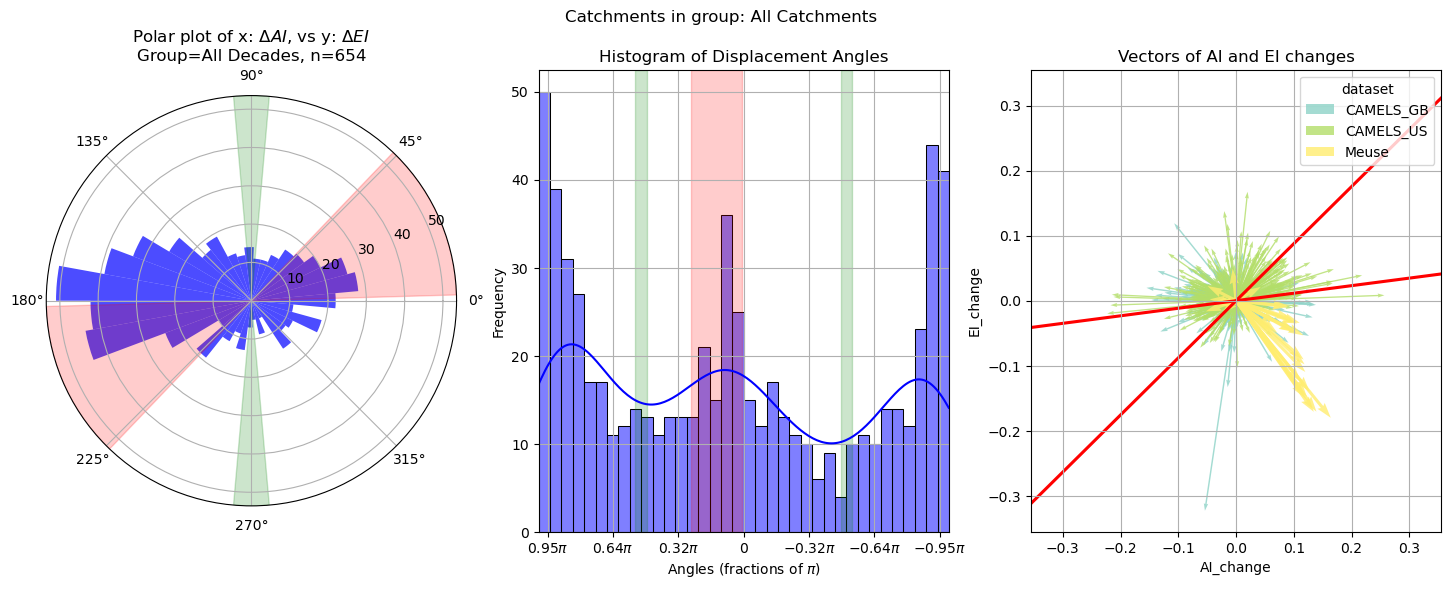

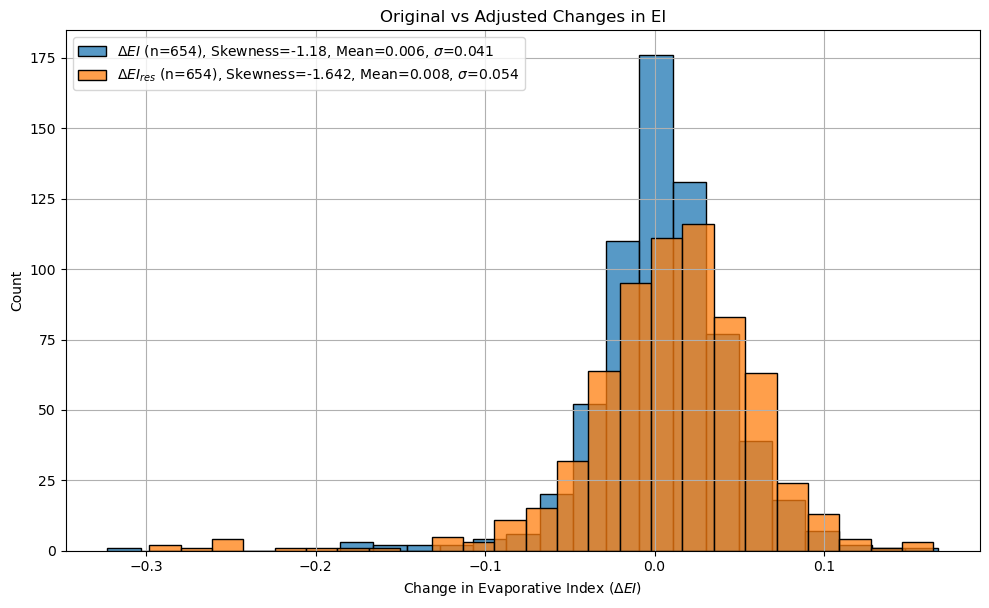

,index,tot_area_x,h_1,h_2,h_3,h_4,h_5,year_trained,catchment_area,h_6,...,theta_RP,r_RP,dy_res,r_res,slope_rad,r1_log,slope,adj_EI_change_all,magnitudes_all,normalized_magnitude_all
6,5102,272.369829,NaN,NaN,196.276429,53.393481,22.620551,1988.9,272.369829,0.079369,...,-1.286766,0.046467,0.039283,0.059437,NaN,NaN,0.646075,0.041840,0.046467,0.136889
7,5112,272.369829,NaN,NaN,177.608467,57.374088,37.327984,2000.0,272.369829,0.059289,...,-2.941277,0.045330,-0.038926,0.039957,NaN,-12.759930,0.653399,-0.038530,0.045330,0.133395
8,5122,272.369829,NaN,NaN,170.327407,60.119788,41.863344,2003.6,272.369829,0.059289,...,-0.312590,0.014500,0.016540,0.017130,NaN,-9.071368,0.657040,0.016728,0.014500,0.038678
15,1146,194.933722,7.084879,7.582641,172.921809,2.072868,5.363984,1988.9,194.933722,-0.092459,...,-0.947218,0.084265,0.087996,0.111457,NaN,NaN,0.614061,0.091211,0.084265,0.253014
16,1156,194.933722,14.066204,5.499649,166.789138,2.623881,6.047308,2000.0,194.933722,-0.092459,...,-1.808927,0.005382,0.001840,0.005544,NaN,NaN,0.618146,0.001964,0.005382,0.010665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,460,2681.514071,605.676328,906.526977,632.291490,467.894572,66.455070,2013.8,2681.514071,0.775273,...,2.004252,0.113487,-0.110269,0.150886,NaN,-3.943371,0.391631,-0.088000,0.113487,0.342792
2387,82,189.952638,7.566952,0.150594,117.517850,63.696575,0.678348,2013.8,189.952638,0.342320,...,2.448794,0.191893,-0.244397,0.273407,NaN,-4.627647,0.513347,-0.210571,0.191893,0.583679
2394,124,550.486854,23.812705,19.166111,155.025828,340.385155,12.261055,2013.8,550.486854,-0.164000,...,2.178688,0.077778,-0.085736,0.106896,NaN,-6.221992,0.457453,-0.073628,0.077778,0.233084
2401,334,123.921347,17.058695,63.001764,12.151182,28.238467,3.686951,2013.8,123.921347,0.152982,...,1.891390,0.111245,-0.090383,0.138981,NaN,-4.107101,0.385021,-0.075706,0.111245,0.335906


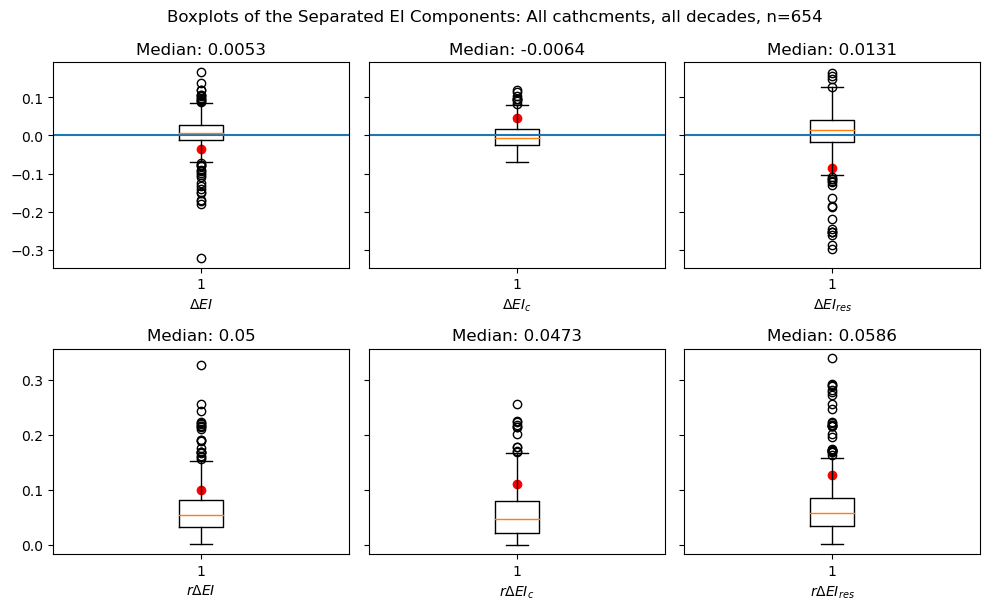

<Figure size 640x480 with 0 Axes>

In [1348]:
import matplotlib.ticker as ticker

def format_pi(value, _):
    frac = value / np.pi
    if frac == 0:
        return '0'
    elif frac == 1:
        return '$\pi$'
    else:
        return f'${frac:.2f}\pi$'


def hist_plot(df, dataset, period, subplot, color, merge, suffix, colorby):  
    # df = df.dropna(subset=['EI_change', 'AI_change')
    # Calculate angles and wrap around if necessary
    
    
    # Calculate the magnitudes of changes
    df = df.dropna(subset=['EI_change', 'AI_change'])
        # Calculate angles and wrap around if necessary
    angles = np.arctan2(df['EI_change'], df['AI_change'])
    
    def angle(angle):
        return np.where(angles > np.pi, angles - 2*np.pi, angles)
    
    angles = np.where(angles > np.pi, angles - 2*np.pi, angles)
    # display(df)
    # break
    
    def estimate_y(AI_mean):
        x = np.linspace(AI_mean * 0.97, AI_mean * 1.03, 100)
        y = w_function(x, w)
        slope, intercept, r, p, se = linregress(x, y)
        return slope
    
    df['slope'] = df['AI_mean'].map(estimate_y)
    # Calculate the magnitudes of changes
    magnitudes = np.sqrt(df['AI_change']**2 + df['EI_change']**2)

    # Remove nan values from angles and magnitudes simultaneously
    valid_indices = ~np.isnan(angles) & ~np.isnan(magnitudes)
    angles = angles[valid_indices]
    magnitudes = magnitudes[valid_indices]

    # Normalize the magnitudes to a specific range for weighting
    min_weight = 0.1  # Minimum weight
    max_weight = 1.0  # Maximum weight
    normalized_magnitudes = (magnitudes - magnitudes.min()) / (magnitudes.max() - magnitudes.min())
    weights = min_weight + (max_weight - min_weight) * normalized_magnitudes

    x0 = df.AI_mean.min()
    x1 = df.AI_mean.max()

    x = np.linspace(x0, x1, 100)
    y = w_function(x, w)
    slope, intercept, r, p, se = linregress(x, y)
    slope_radians = np.arctan(df.slope)
    bin_width = 2 * np.pi / 36  # Assuming 36 bins
    
    # Plot the polar plot in the corresponding subplot
    
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(131, projection='polar')
    
    
    fig.suptitle(f'Catchments in group: {dataset}')
    ax1.hist(angles, bins=np.linspace(-np.pi, np.pi, num=36), color=color, alpha=0.7)
    
    
    
    ax1.set_title(f"Polar plot of x: $\Delta AI$, vs y: $\Delta EI$\nGroup={period}, n={len(df.AI_change.dropna())}")

    # Rotate the red and green spans by 90 degrees (or π/2 radians)
    ax1.axvspan(slope_radians.min() - bin_width/2, slope_radians.max() + bin_width/2, alpha=0.2, color='red')
    ax1.axvspan(slope_radians.min() - bin_width/2 +np.pi, slope_radians.max() + bin_width/2 +np.pi, alpha=0.2, color='red')
    ax1.axvspan(-np.pi/2 - bin_width/2, -np.pi/2 + bin_width/2, alpha=0.2, color='green')
    ax1.axvspan(-np.pi/2 - bin_width/2+np.pi, -np.pi/2 + bin_width/2+np.pi, alpha=0.2, color='green')

    dx = df['AI_change']
    dy = df['EI_change']
    
    change_org = np.array([dx, dy])
        
    expected = np.array([dx, dx*np.tan(slope_radians)])

    change_adj = change_org - expected

    if subplot==True:
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)

        

        # Plot the histogram of angles on the second subplot
        
        sns.histplot(angles, kde=True, bins=np.linspace(-np.pi, np.pi, num=37), ax=ax2, color='blue')
        ax2.set_xlim(np.pi, -np.pi)
        ax2.set_xlabel('Angles (fractions of $\pi$)')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Histogram of Displacement Angles')
        ax2.grid()
        ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_pi))
        ax2.axvspan(slope_radians.min() - bin_width/2, slope_radians.max() + bin_width/2, alpha=0.2, color='red')
        ax2.axvspan(slope_radians.min() - bin_width/2 +np.pi, slope_radians.max() + bin_width/2 +np.pi, alpha=0.2, color='red')
        ax2.axvspan(-np.pi/2 - bin_width/2, -np.pi/2 + bin_width/2, alpha=0.2, color='green')
        ax2.axvspan(-np.pi/2 - bin_width/2+np.pi, -np.pi/2 + bin_width/2+np.pi, alpha=0.2, color='green')
        
        
        
        
        if colorby is not None:
            country_colors = plt.cm.get_cmap('Set3', len(df[colorby].unique()))
            country_colors = country_colors(np.arange(len(df[colorby].unique())))  # Generate colors
            country_colors[:, -1] = 1  # Set alpha value to 1 for full opacity
            legend_labels = []
            for i, country_code in enumerate(df[colorby].unique()):
                country_mask = df[colorby] == country_code
                ax3.quiver(np.zeros(len(df.AI_change[country_mask])), np.zeros(len(df.AI_change[country_mask])), change_org[0][country_mask], change_org[1][country_mask], angles='xy', scale_units='xy', scale=1, color=country_colors[i], alpha=0.8)
                legend_labels.append(country_code)

            # Add a legend to the plot
            ax3.legend(legend_labels, title=colorby, loc='upper right', bbox_to_anchor=(1, 1))

        else:
            ax3.quiver(np.zeros(len(df.AI_change)), np.zeros(len(df.AI_change)), change_org[0], change_org[1], angles='xy', scale_units='xy', scale=1, color='blue')
            # ax3.quiver(np.zeros(len(df.AI_change)), np.zeros(len(df.AI_change)), change_adj[0], change_adj[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.3)
        ax3.quiver(0, 0, np.cos(slope_radians.min()), np.sin(slope_radians.min()), angles='xy', scale_units='xy', scale=1, color='red')
        ax3.quiver(0, 0, -np.cos(slope_radians.min()), -np.sin(slope_radians.min()), angles='xy', scale_units='xy', scale=1, color='red')
        ax3.quiver(0, 0, np.cos(slope_radians.max()), np.sin(slope_radians.max()), angles='xy', scale_units='xy', scale=1, color='red')
        ax3.quiver(0, 0, -np.cos(slope_radians.max()), -np.sin(slope_radians.max()), angles='xy', scale_units='xy', scale=1, color='red')

        max_abs = max(np.max(np.abs(dx))*1.1, np.max(np.abs(dy))*1.1)
        ax3.set_xlim(-max_abs, max_abs)
        ax3.set_ylim(-max_abs, max_abs)
        ax3.set_xlabel('AI_change')
        ax3.set_ylabel('EI_change')
        ax3.set_title('Vectors of AI and EI changes')
        ax3.grid()
        
        
        fig4, ax5 = plt.subplots(figsize=(10, 6.18))

        # Plot the histograms
        sns.histplot(change_org[1], 
             label=f'$\Delta EI$ (n={len(change_org[1])}), Skewness={pd.Series(change_org[1]).skew():.2f}, Mean={change_org[1].mean():.3f}, $\sigma$={change_org[1].std():.3f}', 
             bins=int(np.sqrt(len(change_org[1]))))
        # sns.histplot(change_adj[1], label='$\Delta EI_{adj}$'+f' (n={len(change_adj[1])}), Skewness={pd.Series(change_adj[1]).skew():.3f}, Mean={change_adj[1].mean():.3f}, $\sigma$={change_org[1].std():.3f}', bins=int(np.sqrt(len(change_org[1]))))
        sns.histplot(df.dy_res, label='$\Delta EI_{res}$'+f' (n={len(df.dy_res)}), Skewness={pd.Series(df.dy_res).skew():.3f}, Mean={df.dy_res.mean():.3f}, $\sigma$={df.dy_res.std():.3f}', bins=int(np.sqrt(len(df.dy_res))))
        

        ax5.set_xlabel('Change in Evaporative Index ($\Delta EI$)')
        ax5.set_ylabel('Count')
        ax5.set_title('Original vs Adjusted Changes in EI')
        ax5.grid()
        ax5.legend()
        
    

    plt.tight_layout()
    plt.show()
    
    
    df.loc[:,'adj_EI_change'+suffix] = change_adj[1]
    df.loc[:,'magnitudes'+suffix] = magnitudes
    df.loc[:,'normalized_magnitude'+suffix] = normalized_magnitudes

    return df



    
    # plt.hist(df.AI_change)
merge_w_EI_adj = hist_plot(JM_18.dropna(subset=['AI_change', 'EI_change']), 'All Catchments', 'All Decades', True, 'blue', True, '_all', 'dataset')
df = merge_w_EI_adj
display(merge_w_EI_adj)
fig, ax = plt.subplots(2, 3, figsize=(10, 6.18), sharey='row')  # Set sharey to 'row' to share y-axis on the first row
    
fig.suptitle(f'Catchments in group: All')
plt.suptitle(f'Boxplots of the Separated EI Components: All cathcments, all decades, n={len(df.EI_change)}')
ax[0, 0].boxplot(df.EI_change)
ax[0, 1].boxplot(df.dy_clim)
ax[0, 2].boxplot(df.dy_res)

# Set the median as the title for each subplot
ax[0, 0].set_title(f'Median: {df.EI_change.median():.4f}')
ax[0, 1].set_title(f'Median: {df.dy_clim.median():.4f}')
ax[0, 2].set_title(f'Median: {df.dy_res.median():.4f}')
ax[0, 0].scatter(1, df[df.dataset =='Meuse'].EI_change.median(), c='r')
ax[0, 1].scatter(1, df[df.dataset =='Meuse'].dy_clim.median(), c='r')
ax[0, 2].scatter(1, df[df.dataset =='Meuse'].dy_res.median(), c='r')

ax[0, 0].axhline(0)
ax[0, 1].axhline(0)
ax[0, 2].axhline(0)
# Set x-labels
ax[0, 0].set_xlabel('$\Delta EI$')
ax[0, 1].set_xlabel('$\Delta EI_c$')
ax[0, 2].set_xlabel('$\Delta EI_{res}$')

ax[1, 0].boxplot(df.r_RP)
ax[1, 1].boxplot(df.r_clim)
ax[1, 2].boxplot(df.r_res)
ax[1, 0].scatter(1, df[df.dataset =='Meuse'].r_RP.median(), c='r')
ax[1, 1].scatter(1, df[df.dataset =='Meuse'].r_clim.median(), c='r')
ax[1, 2].scatter(1, df[df.dataset =='Meuse'].r_res.median(), c='r')

# ax[1, 2].boxplot(df.)

# Set the median as the title for each subplot
# ax[1, 0].set_title(f'Median: {df.EI_change.median():.2f}')
ax[1, 0].set_title(f'Median: {df.r_RP.median():.2f}')
ax[1, 1].set_title(f'Median: {df.r_clim.median():.4f}')
ax[1, 2].set_title(f'Median: {df.r_res.median():.4f}')
# ax[1, 0].axhline(0)
# ax[1, 0].axhline(0)
# ax[1, 1].axhline(0)
# Set x-labels
# ax[1, 0].set_xlabel('$\Delta EI$')
ax[1, 0].set_xlabel('$r \Delta EI$')
ax[1, 1].set_xlabel('$r \Delta EI_c$')
ax[1, 2].set_xlabel('$r \Delta EI_{res}$')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'] = df['AI_mean'].map(estimate_y)
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  country_colors = plt.cm.get_cmap('Set3', len(df[colorby].unique()))


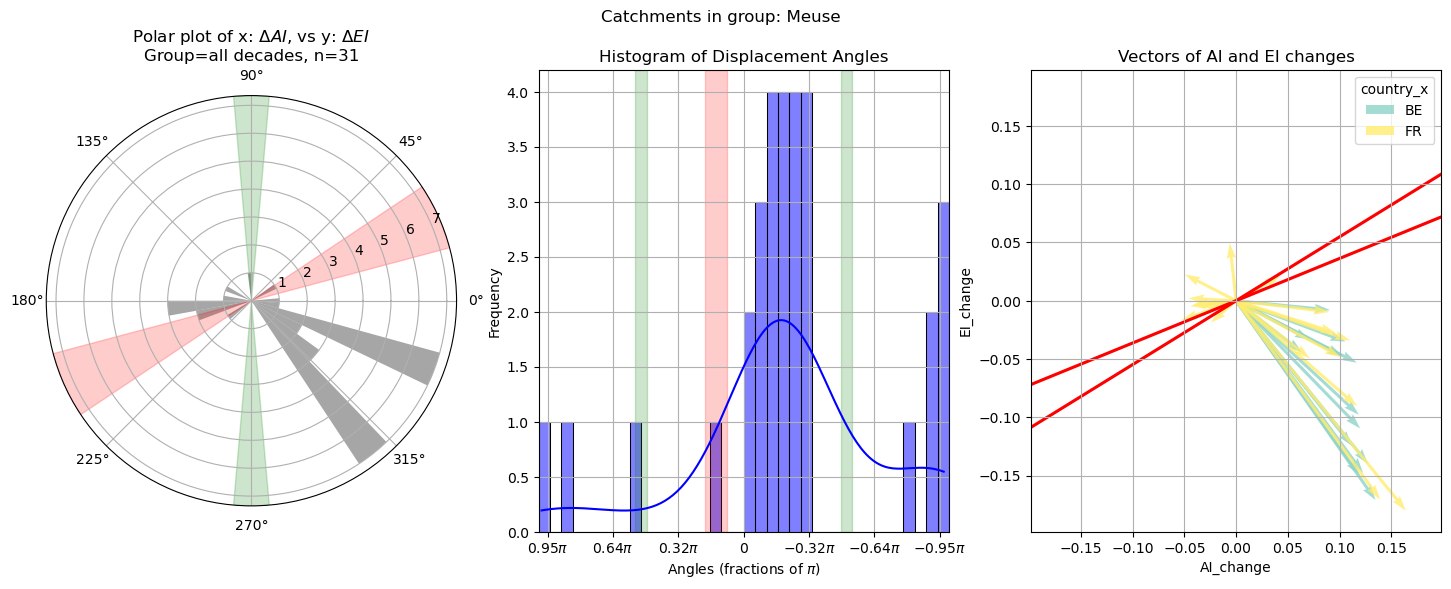

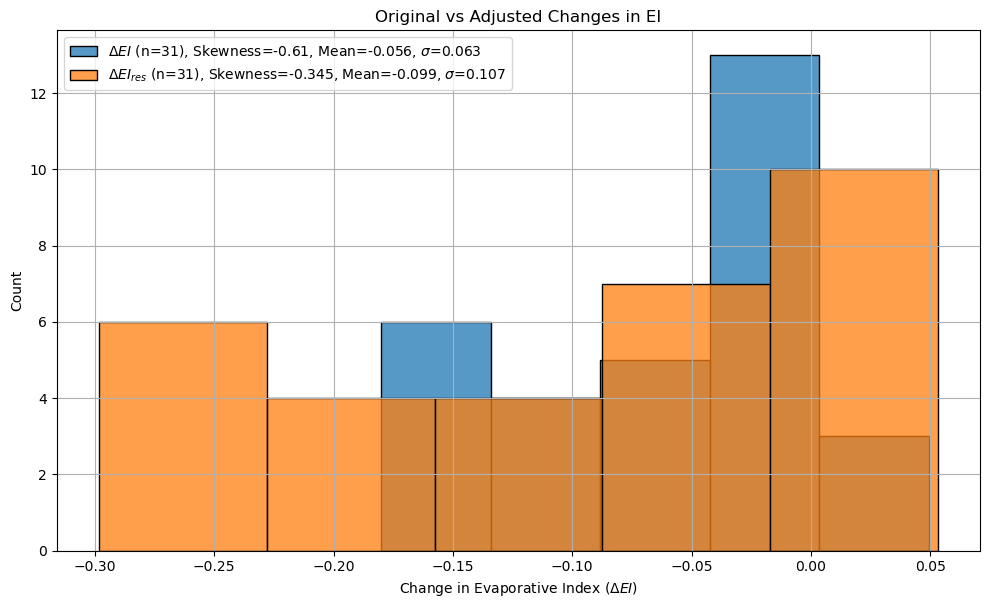

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'adj_EI_change'+suffix] = change_adj[1]
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'magnitudes'+suffix] = magnitudes
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

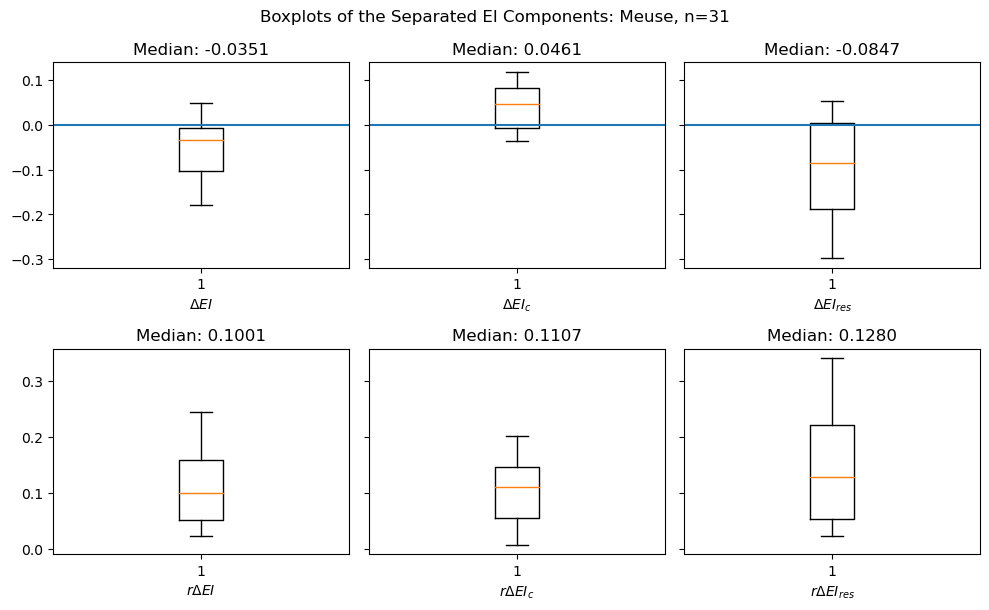

<Figure size 640x480 with 0 Axes>

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'] = df['AI_mean'].map(estimate_y)
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  country_colors = plt.cm.get_cmap('Set3', len(df[colorby].unique()))


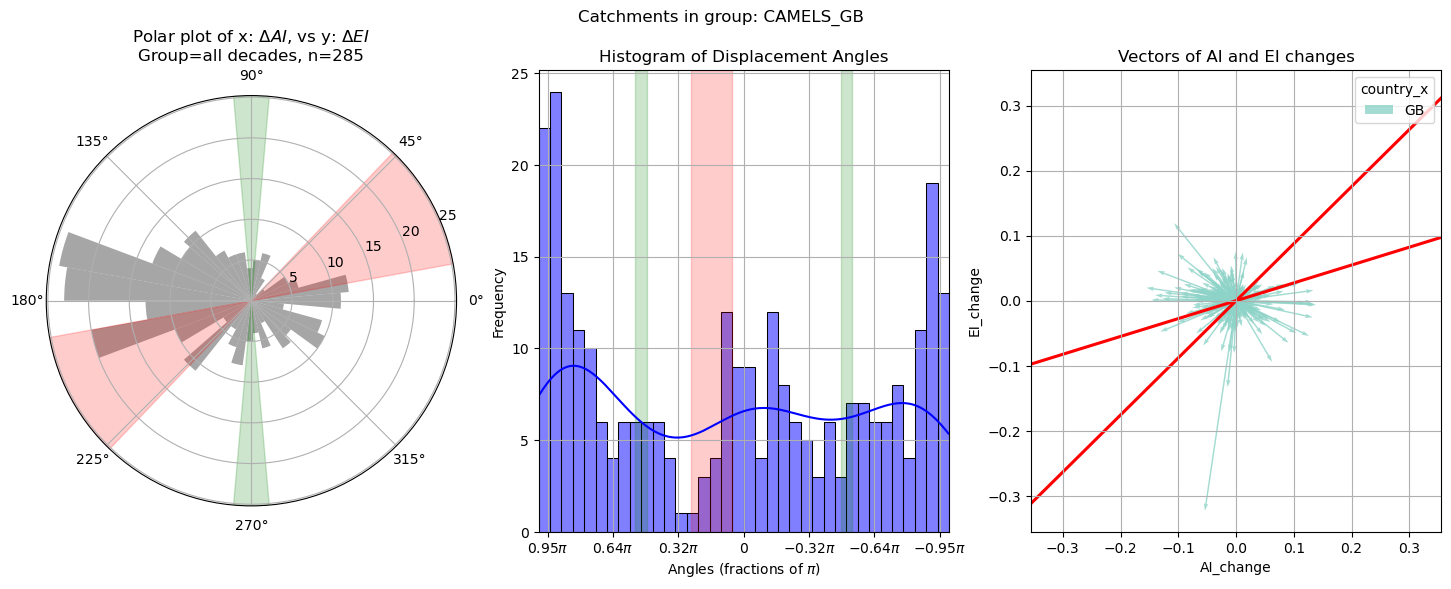

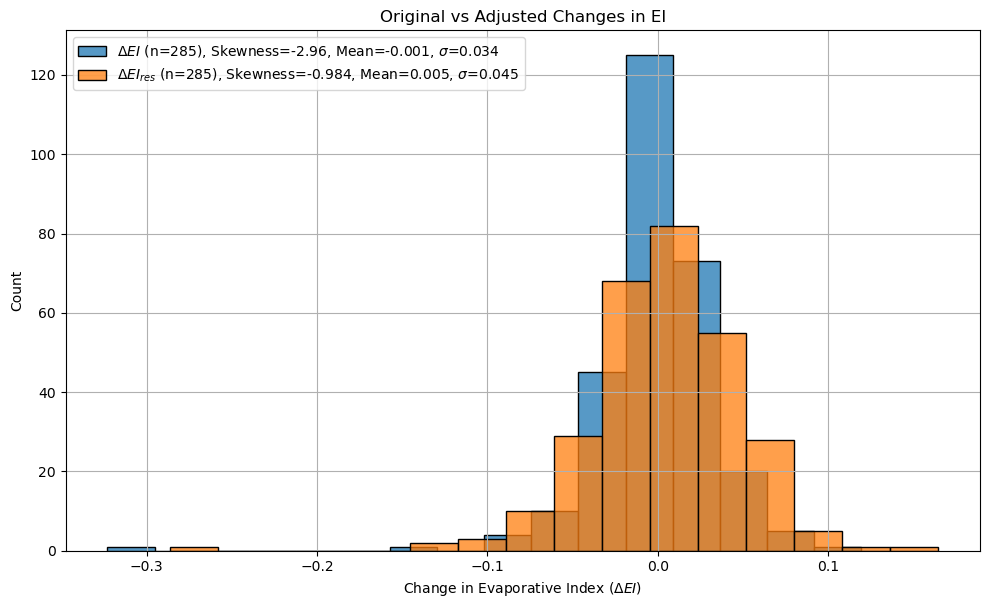

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'adj_EI_change'+suffix] = change_adj[1]
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'magnitudes'+suffix] = magnitudes
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

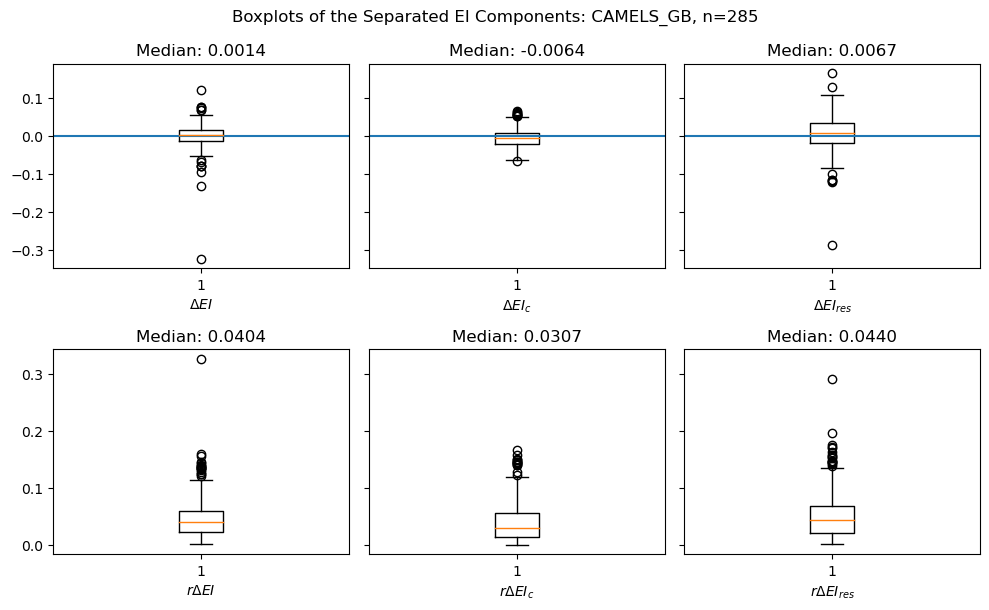

<Figure size 640x480 with 0 Axes>

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'] = df['AI_mean'].map(estimate_y)
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  country_colors = plt.cm.get_cmap('Set3', len(df[colorby].unique()))


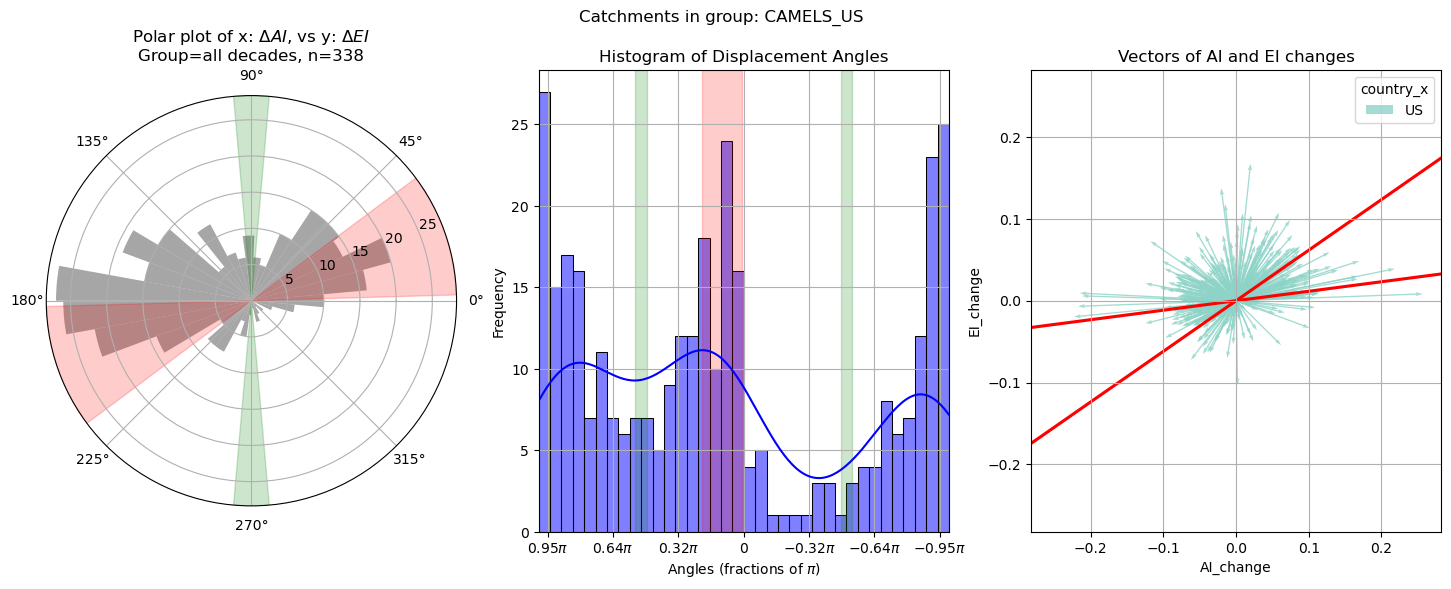

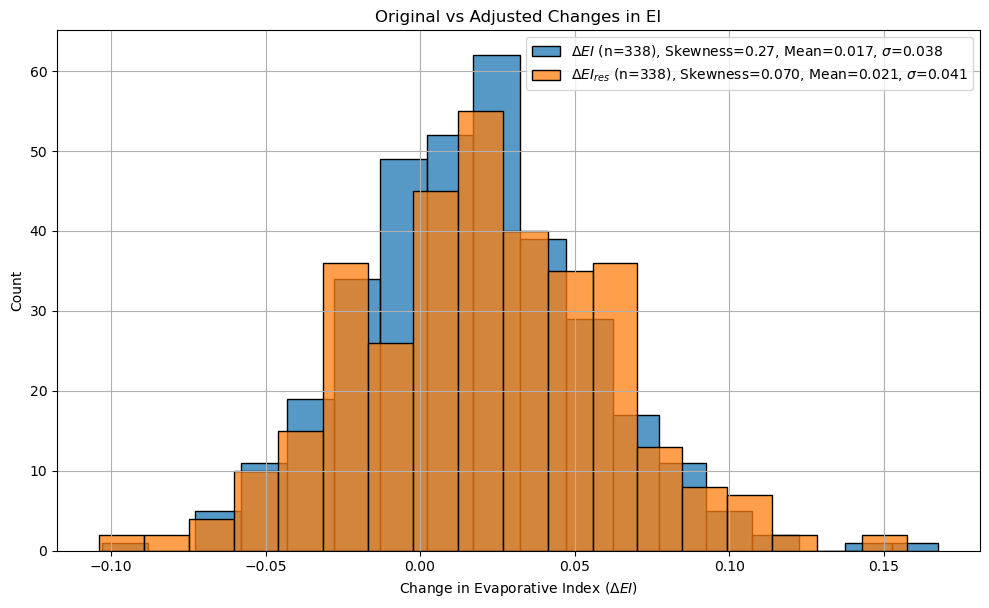

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'adj_EI_change'+suffix] = change_adj[1]
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'magnitudes'+suffix] = magnitudes
C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\2667316022.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

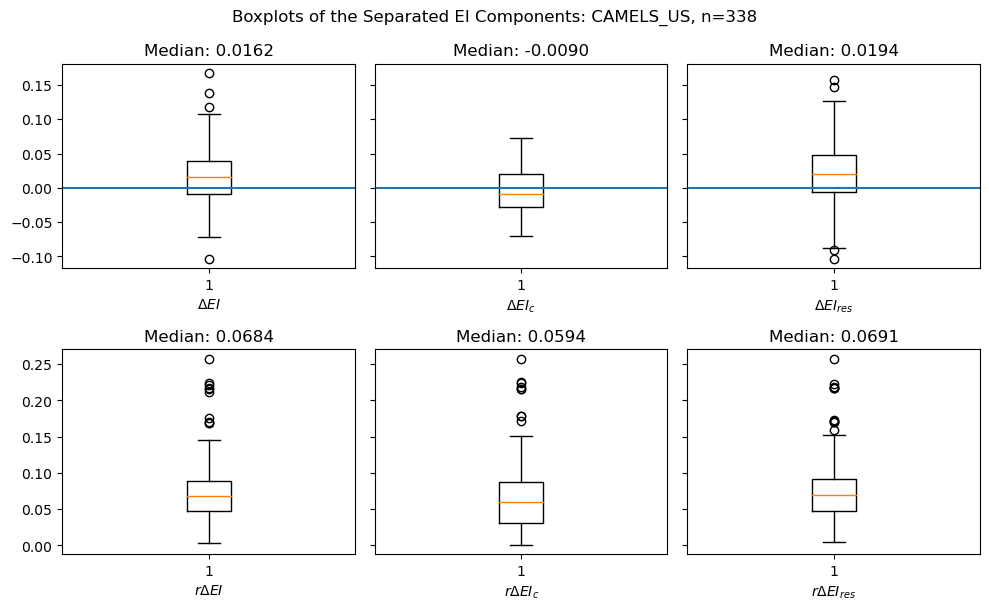

<Figure size 640x480 with 0 Axes>

,index,tot_area_x,h_1,h_2,h_3,h_4,h_5,year_trained,catchment_area,h_6,...,theta_RP,r_RP,dy_res,r_res,slope_rad,r1_log,slope,adj_EI_change_ds,magnitudes_ds,normalized_magnitude_ds
2213,544,1247.982599,279.124531,351.158787,139.964615,443.133045,32.196991,2013.8,1247.982599,2.404630,...,2.311302,0.162361,-0.188983,0.223779,NaN,-3.561442,0.427877,-0.160817,0.162361,0.631343
2220,166,1471.943902,115.300560,160.737793,294.963540,878.348241,22.380201,2013.8,1471.943902,0.213567,...,2.260762,0.153620,-0.164847,0.203009,NaN,-4.439875,0.426845,-0.148354,0.153620,0.591641
2227,208,302.637555,14.375550,2.288189,83.940341,192.239679,11.100450,2013.8,302.637555,0.066260,...,2.409139,0.167561,-0.220336,0.247189,NaN,-7.758822,0.496391,-0.180207,0.167561,0.654963
2234,292,162.777877,12.344943,26.093338,44.008575,76.886036,3.426106,2013.8,162.777877,0.018879,...,2.011069,0.078924,-0.072087,0.101460,NaN,-4.003533,0.393146,-0.061706,0.078924,0.252363
2241,502,305.818286,29.801659,272.527978,0.787201,3.151946,NaN,2013.8,305.818286,-0.454508,...,1.998923,0.128150,-0.129262,0.174070,NaN,-3.166286,0.362805,-0.095501,0.128150,0.475954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,8382,NaN,NaN,188.415121,80.492536,NaN,7.847900,2004.5,276.838680,0.083122,...,-2.464302,0.012065,-0.008833,0.011627,NaN,NaN,0.136108,-0.008373,0.012065,0.032321
2197,12190,NaN,5.207067,17.232669,1342.060990,55.865870,169.342946,1994.5,1590.122276,0.412735,...,-1.602303,0.217649,0.008284,0.217699,NaN,NaN,0.147046,0.025132,0.217649,0.844920
2198,12200,NaN,5.207067,17.420481,1298.947283,112.726484,155.408227,2004.5,1590.122276,0.412735,...,-0.072638,0.029507,0.029617,0.029695,NaN,NaN,0.147360,0.029744,0.029507,0.101262
2205,10534,NaN,3.452183,22.600704,536.475126,44.106043,126.679082,1994.5,733.383019,0.069881,...,-1.527456,0.215303,0.028282,0.216952,NaN,NaN,0.164159,0.044639,0.215303,0.835647


In [1341]:
country_df = HC_df[['catchment', 'country']]

country_codes = ['Meuse', 'CAMELS_GB', 'CAMELS_US']


df_new = pd.DataFrame()
# Iterate over each country and its catchments
for i, country in enumerate(country_codes):
    
    subset_df = JM_18[JM_18['dataset'] == country]
    color = 'grey'
    # Plot the histograms using the three_hist_plot function
    df = hist_plot(subset_df, country, 'all decades', True, color, True, '_ds', 'country_x')
    df_new = pd.concat([df_new, df])
    
    plt.show()
    
    # Create subplots with 1 row and 3 columns
    fig, ax = plt.subplots(2, 3, figsize=(10, 6.18), sharey='row')  # Set sharey to 'row' to share y-axis on the first row
    
    fig.suptitle(f'Catchments in group: {country}')
    plt.suptitle(f'Boxplots of the Separated EI Components: {country}, n={len(df.EI_change)}')
    ax[0, 0].boxplot(df.EI_change)
    ax[0, 1].boxplot(df.dy_clim)
    ax[0, 2].boxplot(df.dy_res)

    # Set the median as the title for each subplot
    ax[0, 0].set_title(f'Median: {df.EI_change.median():.4f}')
    ax[0, 1].set_title(f'Median: {df.dy_clim.median():.4f}')
    ax[0, 2].set_title(f'Median: {df.dy_res.median():.4f}')

    ax[0, 0].axhline(0)
    ax[0, 1].axhline(0)
    ax[0, 2].axhline(0)
    # Set x-labels
    ax[0, 0].set_xlabel('$\Delta EI$')
    ax[0, 1].set_xlabel('$\Delta EI_c$')
    ax[0, 2].set_xlabel('$\Delta EI_{res}$')

    ax[1, 0].boxplot(df.r_RP)
    ax[1, 1].boxplot(df.r_clim)
    ax[1, 2].boxplot(df.r_res)

    # ax[1, 2].boxplot(df.)

    # Set the median as the title for each subplot
    # ax[1, 0].set_title(f'Median: {df.EI_change.median():.2f}')
    ax[1, 0].set_title(f'Median: {df.r_RP.median():.4f}')
    ax[1, 1].set_title(f'Median: {df.r_clim.median():.4f}')
    ax[1, 2].set_title(f'Median: {df.r_res.median():.4f}')
    # ax[1, 0].axhline(0)
    # ax[1, 0].axhline(0)
    # ax[1, 1].axhline(0)
    # Set x-labels
    # ax[1, 0].set_xlabel('$\Delta EI$')
    ax[1, 0].set_xlabel('$r \Delta EI$')
    ax[1, 1].set_xlabel('$r \Delta EI_c$')
    ax[1, 2].set_xlabel('$r \Delta EI_{res}$')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    

dataset_adj = df_new
display(df_new)

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\3839042415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2018['catchment'] = filtered_df_2018['catchment'].str.strip()


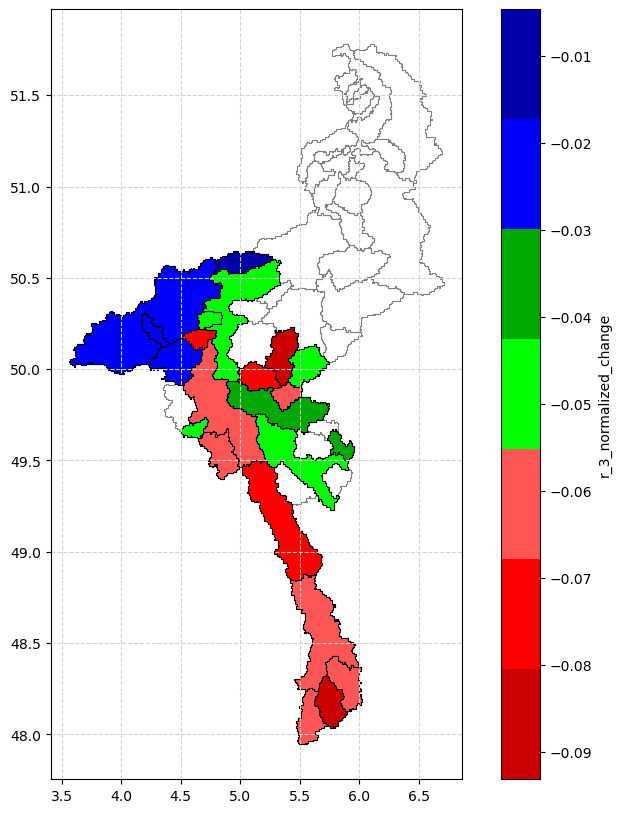

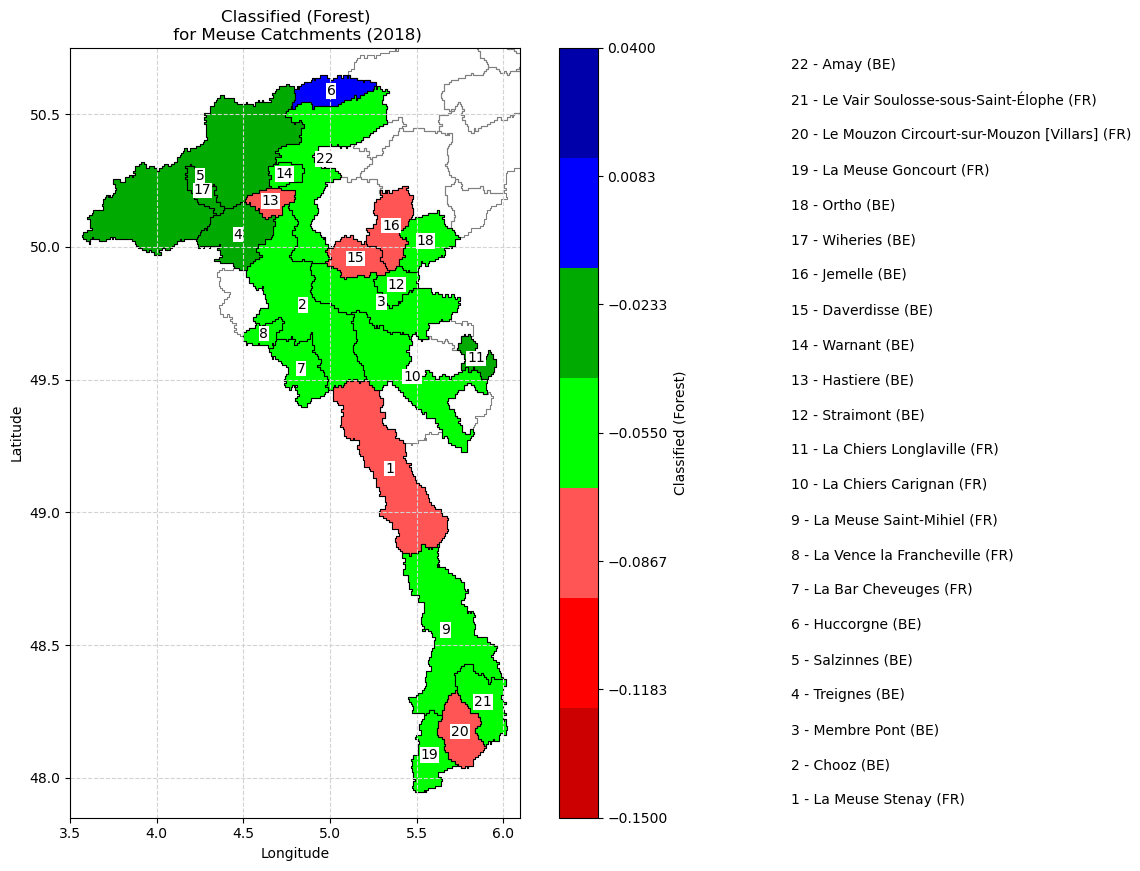

C:\Users\creeb\AppData\Local\Temp\ipykernel_36224\3839042415.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2008['catchment'] = filtered_df_2008['catchment'].str.strip()


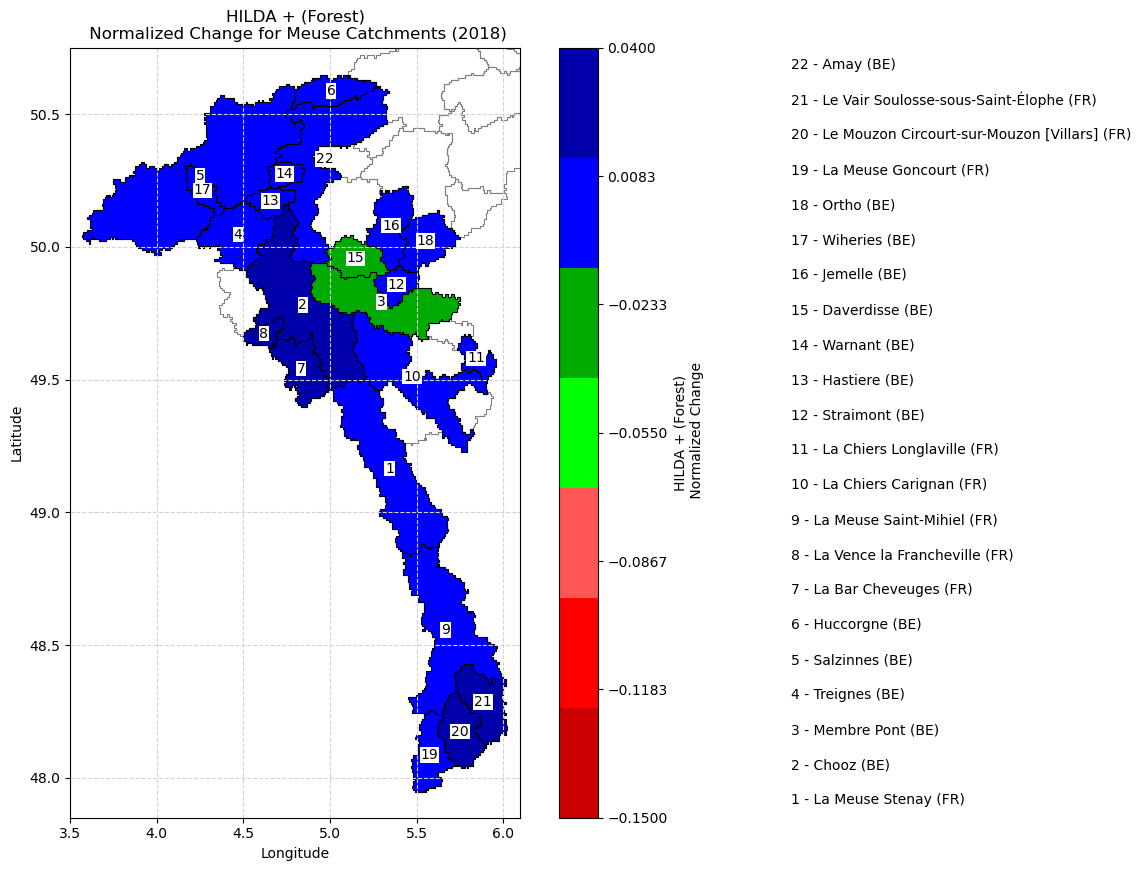

In [1404]:
# Filter the data for the year 2018
filtered_df_2018 = JM_18[(JM_18['dataset'] == 'Meuse') & (JM_18['image_date'].dt.year == 2018)]

string = 'r_3_normalized_change'

meuse_shp = gpd.read_file(r"H:\My Drive\Delft\TUDELFT\Thesis\GIS\Shapefiles\Meuse\Meuse_Catchments_4326_WFLOW.shp")
meuse_shp_18 = meuse_shp[meuse_shp.station_re.str.strip().isin(filtered_df_2018.catchment.drop_duplicates().values)]
# Remove trailing spaces from 'station_re' in the filtered_df
filtered_df_2018['catchment'] = filtered_df_2018['catchment'].str.strip()

# Merge the filtered_df with meuse_shp_18 based on matching catchments
merged_shp_2018 = meuse_shp_18.merge(filtered_df_2018[['catchment', 'dy_res','Sr_mean_diff_pct', 'country_x', string]], left_on='station_re', right_on='catchment')

# Create a colormap for dy_res values
cmap = ListedColormap(['#cc0000', '#FF0000','#FF5555', '#00FF00','#00AA00', '#0000FF','#0000AA'])  # Example colormap with three colors

# Plot the shapefile with colored polygons based on dy_res values for 2018
fig, ax = plt.subplots(figsize=(10, 10))

# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp_2018.plot(column=string, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k')

# Add a colorbar and set the label
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical')  # Use index 1 for the filtered polygons
cbar.set_label(string)

# Save the minimum and maximum values from the 2018 colorbar
cbar_min = -0.15
cbar_max = 0.04

# Plot the shapefile with colored polygons based on dy_res values for 2008
fig, ax = plt.subplots(figsize=(10, 10))

# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp_2018.plot(column=string, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k', vmin=cbar_min, vmax=cbar_max)

cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', ticks=np.linspace(cbar_min, cbar_max, num=7))
cbar.set_label(translate_col_name(string))

name_list = []

# Plot numbers at the centroid of each polygon with white buffer
for idx, row in merged_shp_2018.iterrows():
    name = name_list.append(row.station_re.strip())
    centroid = row.geometry.centroid
    label = f'{idx+1}'
    ax.text(centroid.x, centroid.y, str(label), ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Create a list of names on the side of the plot
name_list = merged_shp_2018['station_re'].tolist()

# Add the list of names with country codes to the plot
for i, name in enumerate(name_list):
    row = merged_shp_2018[merged_shp_2018['station_re'] == name].iloc[0]
    label = f'{i + 1} - {name} ({row["country_x"]})'
    ax.text(1.6, (i + 0.5) / len(name_list), label, transform=ax.transAxes, va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=0.5))

# Add other plot customizations (title, axis labels, etc.)
plt.title(f'{translate_col_name(string)} for Meuse Catchments (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(3.5, 6.1)
plt.ylim(47.85, 50.75)

# Show the plot
plt.show()


string = 'h_4_normalized_change'
filtered_df_2008 = JM_18[(JM_18['dataset'] == 'Meuse') & (JM_18['image_date'].dt.year == 2018)]

meuse_shp = gpd.read_file(r"H:\My Drive\Delft\TUDELFT\Thesis\GIS\Shapefiles\Meuse\Meuse_Catchments_4326_WFLOW.shp")
meuse_shp_08 = meuse_shp[meuse_shp.station_re.str.strip().isin(filtered_df_2008.catchment.drop_duplicates().values)]
# Remove trailing spaces from 'station_re' in the filtered_df
filtered_df_2008['catchment'] = filtered_df_2008['catchment'].str.strip()

# Merge the filtered_df with meuse_shp_18 based on matching catchments
merged_shp_2008 = meuse_shp_08.merge(filtered_df_2008[['catchment', 'dy_res','Sr_mean_diff_pct', 'country_x', string]], left_on='station_re', right_on='catchment')
# Use the same colormap and levels for 2008
fig, ax = plt.subplots(figsize=(10, 10))

# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp_2008.plot(column=string, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k',vmin=cbar_min, vmax=cbar_max)

# Add a colorbar and set the label
# Add a colorbar and set the label using the same range as the 2018 colorbar
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', ticks=np.linspace(cbar_min, cbar_max, num=7))
cbar.set_label(translate_col_name(string))
name_list = []

# Plot numbers at the centroid of each polygon with white buffer
for idx, row in merged_shp_2008.iterrows():
    name = name_list.append(row.station_re.strip())
    centroid = row.geometry.centroid
    label = f'{idx+1}'
    ax.text(centroid.x, centroid.y, str(label), ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Create a list of names on the side of the plot
name_list = merged_shp_2008['station_re'].tolist()

# Add the list of names with country codes to the plot
for i, name in enumerate(name_list):
    row = merged_shp_2008[merged_shp_2008['station_re'] == name].iloc[0]
    label = f'{i + 1} - {name} ({row["country_x"]})'
    ax.text(1.6, (i + 0.5) / len(name_list), label, transform=ax.transAxes, va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=0.5))

# Add other plot customizations (title, axis labels, etc.)

plt.title(f'{translate_col_name(string)} for Meuse Catchments (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(3.5, 6.1)
plt.ylim(47.85, 50.75)

# Show the plot
plt.show()

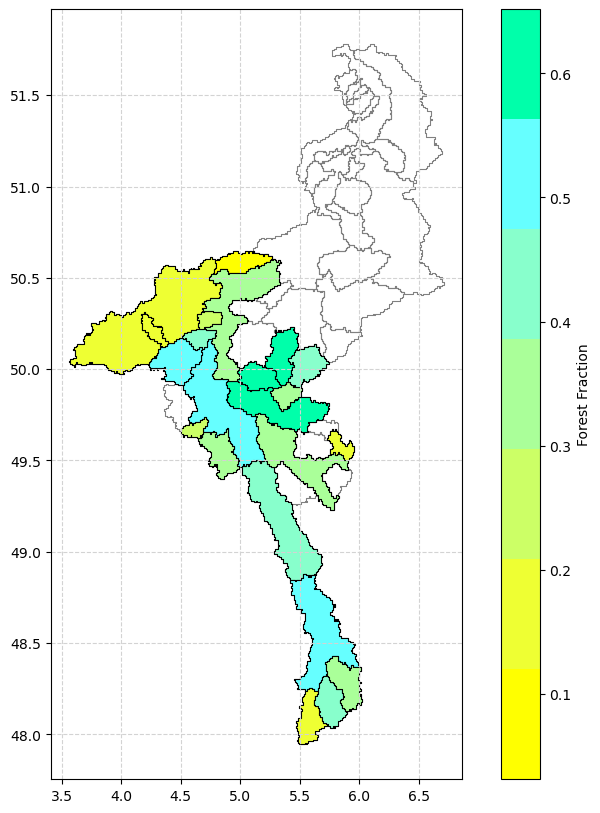

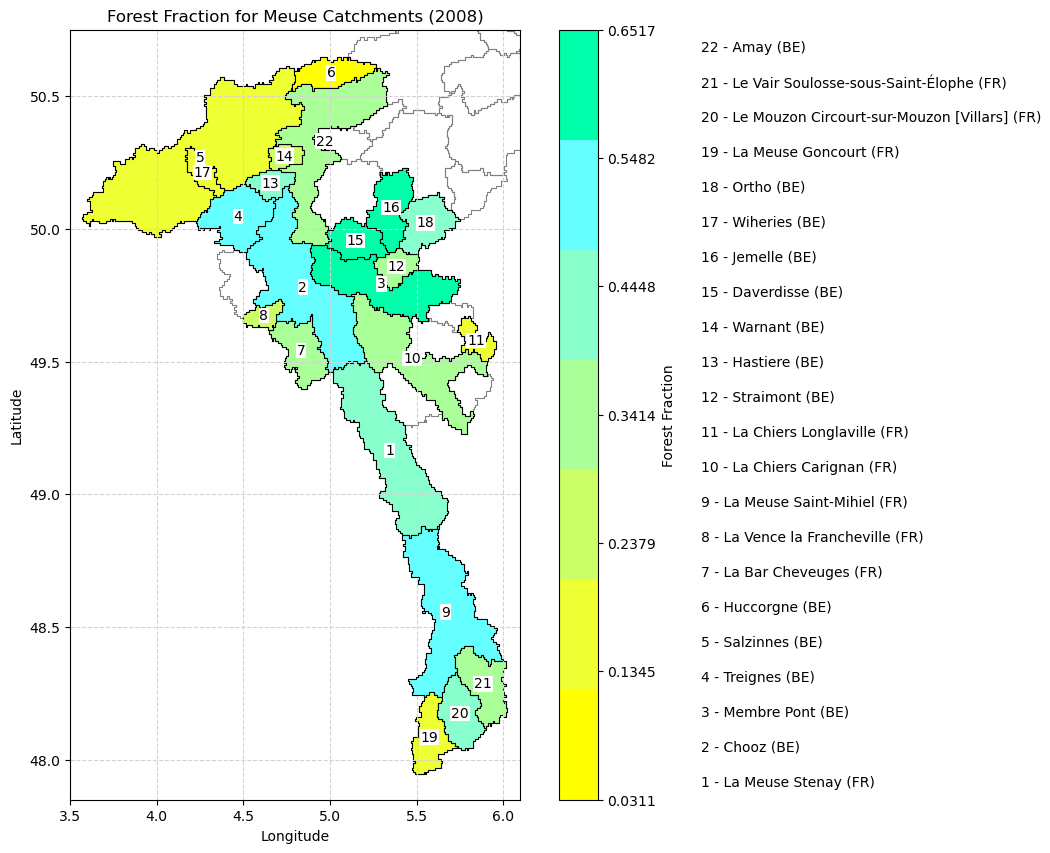

In [1384]:
grouped_df = JM_18[(JM_18['dataset'] == 'Meuse')].groupby('catchment')

new_df = pd.DataFrame()

for i, (catch, data) in enumerate(grouped_df):
    mean = (data['c_3']/data['catchment_area']).mean()
    country = data.country_x.values
    df = pd.DataFrame({'index':i,'catchment':catch, 'c_3':mean, 'country_x':country[0]}, index=[0])
    new_df = pd.concat([new_df, df])

# display(new_df)
# Merge the filtered_df with meuse_shp_18 based on matching catchments
merged_shp_2008 = meuse_shp_18.merge(new_df, left_on='station_re', right_on='catchment')

meuse_shp = gpd.read_file(r"H:\My Drive\Delft\TUDELFT\Thesis\GIS\Shapefiles\Meuse\Meuse_Catchments_4326_WFLOW.shp")
meuse_shp_18 = meuse_shp[meuse_shp.station_re.str.strip().isin(new_df.catchment.drop_duplicates().values)]
merged_shp_2018 = meuse_shp_18.merge(new_df, left_on='station_re', right_on='catchment')


# Create a colormap for dy_res values
cmap = ListedColormap(['#FFFF00', '#EEFF33', '#CCFF66', '#AAFF99', '#88FFCC', '#66FFFF', '#00FFAA'])  # Example colormap with three colors

# Plot the shapefile with colored polygons based on dy_res values for 2018
fig, ax = plt.subplots(figsize=(10, 10))

# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp_2018.plot(column='c_3', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k')

# Add a colorbar and set the label
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical')  # Use index 1 for the filtered polygons
cbar.set_label('Forest Fraction')

# Save the minimum and maximum values from the 2018 colorbar
cbar_min = cbar.vmin
cbar_max = cbar.vmax

# Use the same colormap and levels for 2008
fig, ax = plt.subplots(figsize=(10, 10))


# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp_2008.plot(column='c_3', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k',vmin=cbar_min, vmax=cbar_max)

# Add a colorbar and set the label
# Add a colorbar and set the label using the same range as the 2018 colorbar
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', ticks=np.linspace(cbar_min, cbar_max, num=7))
cbar.set_label('Forest Fraction')
name_list = []

# Plot numbers at the centroid of each polygon with white buffer
for idx, row in merged_shp_2008.iterrows():
    name = name_list.append(row.station_re.strip())
    centroid = row.geometry.centroid
    label = f'{idx+1}'
    ax.text(centroid.x, centroid.y, str(label), ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Create a list of names on the side of the plot
name_list = merged_shp_2008['station_re'].tolist()

# Add the list of names with country codes to the plot
for i, name in enumerate(name_list):
    row = merged_shp_2008[merged_shp_2008['station_re'] == name].iloc[0]
    label = f'{i + 1} - {name} ({row["country_x"]})'
    ax.text(1.4, (i + 0.5) / len(name_list), label, transform=ax.transAxes, va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=0.5))

# Add other plot customizations (title, axis labels, etc.)
plt.title('Forest Fraction for Meuse Catchments (2008)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(3.5, 6.1)
plt.ylim(47.85, 50.75)

# Show the plot
plt.show()

In [ ]:
list(JM_18.keys())

In [1386]:
plt.scatter(JM_18.Sr_mean_diff_pct[JM_18.Sr_mean_diff_pct < 10], JM_18.dy_res[JM_18.Sr_mean_diff_pct < 10], c=[int(i[:2]) for i in JM_18['AI_group_narrow'].values.drop_duplicates()], cmap='viridis')

AttributeError: 'Categorical' object has no attribute 'drop_duplicates'

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


filtered_df = JM_18[(JM_18['dataset'] == 'Meuse') & (JM_18['image_date'].dt.year == 2018)]
filtered

meuse_shp = gpd.read_file(r"H:\My Drive\Delft\TUDELFT\Thesis\GIS\Shapefiles\Meuse\Meuse_Catchments_4326_WFLOW.shp")
meuse_shp_18 = meuse_shp[meuse_shp.station_re.str.strip().isin(filtered_df.catchment.drop_duplicates().values)]
# Remove trailing spaces from 'station_re' in the filtered_df
filtered_df['catchment'] = filtered_df['catchment'].str.strip()

# Merge the filtered_df with meuse_shp_18 based on matching catchments
merged_shp = meuse_shp_18.merge(filtered_df[['catchment', 'dy_res', 'country_x']], left_on='station_re', right_on='catchment')

# Create a colormap for dy_res values
cmap = ListedColormap(['#cc0000', '#FF0000','#FF5555', '#00FF00','#00AA00', '#0000FF','#0000AA'])  # Example colormap with three colors

# Plot the shapefile with colored polygons based on dy_res values
fig, ax = plt.subplots(figsize=(10, 10))

# Add faint grid lines
ax.grid(color='lightgray', linestyle='--')

# Plot the polygons with transparent fill for the ones that didn't pass the filter
meuse_shp.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.8)
merged_shp.plot(column='dy_res', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='k')

# Add a colorbar and set the label
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical')  # Use index 1 for the filtered polygons
cbar.set_label('residual evaporative effect')

name_list = []

# Plot numbers at the centroid of each polygon with white buffer
for idx, row in merged_shp.iterrows():
    name = name_list.append(row.station_re.strip())
    centroid = row.geometry.centroid
    label = f'{idx+1}'
    ax.text(centroid.x, centroid.y, str(label), ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Create a list of names on the side of the plot
name_list = merged_shp['station_re'].tolist()
# name_list = sorted(name_list, key=str.lower, reverse=True)  # Sort names alphabetically (optional)

# Add the list of names with country codes to the plot
for i, name in enumerate(name_list):
    row = merged_shp[merged_shp['station_re'] == name].iloc[0]
    label = f'{i + 1} - {name} ({row["country_x"]})'
    ax.text(1.4, (i + 0.5) / len(name_list), label, transform=ax.transAxes, va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', pad=0.5))

# Add other plot customizations (title, axis labels, etc.)
plt.title('Change in Evaporative Index Residual Values for Meuse Catchments (2009-2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(3.5, 6.1)
plt.ylim(47.85, 50.75)

# Show the plot
plt.show()



In [ ]:
indices = [10, 11, 12, 15,3, 15,16,18]
many_catchments = [name_list[i] for i in indices]

df = annual_lc
df = df[df.catchment=='Jemelle']
plt.plot(df.image_date, df.c_1.interpolate('ffill')/df.catchment_area)
plt.plot(df.image_date, df.c_2.interpolate('ffill')/df.catchment_area)


In [1365]:
dfs = pd.DataFrame()

print(JM_18.r_res)

AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
labels=[f'{float(AI_levels[0])}-{float(AI_levels[1])}',
         f'{float(AI_levels[1])}-{float(AI_levels[2])}',
         f'{float(AI_levels[2])}-{float(AI_levels[3])}',
         f'{float(AI_levels[3])}-{float(AI_levels[4])}',
         f'{float(AI_levels[4])}-{float(AI_levels[5])}',
         f'{float(AI_levels[5])}-{float(AI_levels[6])}',
         f'{float(AI_levels[6])}-{float(AI_levels[7])}',
         f'{float(AI_levels[7])}-{float(AI_levels[8])}',
         f'{float(AI_levels[8])}-{float(AI_levels[9])}',]
aridity_table_SR = JM_18.sort_values('LT_AI')
aridity_table_SR['AI_group_narrow'] = pd.cut(aridity_table_SR['LT_AI'], AI_levels, labels=labels, ordered=True)
grouped_SR = aridity_table_SR.groupby('AI_group_narrow')

JM_18 = aridity_table_SR

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2404         NaN
2405         NaN
2406         NaN
2407         NaN
2408    0.106104
Name: r_res, Length: 2370, dtype: float64


In [ ]:
df_new = pd.DataFrame()
# Iterate over each country and its catchments
for i, country in enumerate(labels):
    
    subset_df = aridity_table_SR[aridity_table_SR['AI_group_narrow'] == country]
    color = 'grey'
    # Plot the histograms using the three_hist_plot function
    df = hist_plot(subset_df, country, 'all decades', True, colors5[i], True, '_ds', 'country_x')
    df_new = pd.concat([df_new, df])
    
    plt.show()
    
    # Create subplots with 1 row and 3 columns
    fig, ax = plt.subplots(2, 3, figsize=(10, 6.18), sharey='row')  # Set sharey to 'row' to share y-axis on the first row
    
    fig.suptitle(f'Catchments in group: {country}')
    plt.suptitle(f'Boxplots of the Separated EI Components: {country}, n={len(df.EI_change)}')
    ax[0, 0].boxplot(df.EI_change)
    ax[0, 1].boxplot(df.dy_clim)
    ax[0, 2].boxplot(df.dy_res)

    # Set the median as the title for each subplot
    ax[0, 0].set_title(f'Median: {df.EI_change.median():.4f}')
    ax[0, 1].set_title(f'Median: {df.dy_clim.median():.4f}')
    ax[0, 2].set_title(f'Median: {df.dy_res.median():.4f}')

    ax[0, 0].axhline(0)
    ax[0, 1].axhline(0)
    ax[0, 2].axhline(0)
    # Set x-labels
    ax[0, 0].set_xlabel('$\Delta EI$')
    ax[0, 1].set_xlabel('$\Delta EI_c$')
    ax[0, 2].set_xlabel('$\Delta EI_{res}$')

    ax[1, 0].boxplot(df.r_RP)
    ax[1, 1].boxplot(df.r_clim)
    ax[1, 2].boxplot(df.r_res)

    # ax[1, 2].boxplot(df.)

    # Set the median as the title for each subplot
    # ax[1, 0].set_title(f'Median: {df.EI_change.median():.2f}')
    ax[1, 0].set_title(f'Median: {df.r_RP.median():.4f}')
    ax[1, 1].set_title(f'Median: {df.r_clim.median():.4f}')
    ax[1, 2].set_title(f'Median: {df.r_res.median():.4f}')
    # ax[1, 0].axhline(0)
    # ax[1, 0].axhline(0)
    # ax[1, 1].axhline(0)
    # Set x-labels
    # ax[1, 0].set_xlabel('$\Delta EI$')
    ax[1, 0].set_xlabel('$r \Delta EI$')
    ax[1, 1].set_xlabel('$r \Delta EI_c$')
    ax[1, 2].set_xlabel('$r \Delta EI_{res}$')

    # Adjust spacing between subplots
    plt.tight_layout()

    result_df = bootstrap_regression(df,ind_vars, 'dy_res', 1000, country)
    # Show the plot
    plt.show()

In [ ]:
for i, (group, data) in enumerate(grouped_SR):
    if i < 5:
        result_df = bootstrap_regression(data.dropna(subset=['dy_res']+ind_vars),ind_vars, 'dy_res', 1000, group)
        

    else:
        print(group)

# Concatenate all the dataframes in dfs


# Merge with big_merge
adj_add_ai = dfs

In [ ]:
dfs = pd.DataFrame()

print(JM_18.r_res)

AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
labels=[f'{float(AI_levels[0])}-{float(AI_levels[1])}',
         f'{float(AI_levels[1])}-{float(AI_levels[2])}',
         f'{float(AI_levels[2])}-{float(AI_levels[3])}',
         f'{float(AI_levels[3])}-{float(AI_levels[4])}',
         f'{float(AI_levels[4])}-{float(AI_levels[5])}',
         f'{float(AI_levels[5])}-{float(AI_levels[6])}',
         f'{float(AI_levels[6])}-{float(AI_levels[7])}',
         f'{float(AI_levels[7])}-{float(AI_levels[8])}',
         f'{float(AI_levels[8])}-{float(AI_levels[9])}',]
aridity_table_SR = JM_18.sort_values('LT_AI')
aridity_table_SR['AI_group_narrow'] = pd.cut(aridity_table_SR['LT_AI'], AI_levels, labels=labels, ordered=True)
grouped_SR = aridity_table_SR.groupby('AI_group_narrow')

fig, ax = plt.subplots(2, 3, figsize=(8,5))
for i, (group, data) in enumerate(grouped_SR):
    
    if i < 5:

        df=data
        display(data)
        # break
        # Create subplots with 1 row and 3 columns
        
        # print(df.EI_change)
        # fig.suptitle(f'Catchments in group: {group}')
        
        plt.suptitle(f'Boxplots of the Separated EI Components: {group}, n={len(df.EI_change)}')
        
        ax[0, 0].boxplot(df.EI_change)
        ax[0, 1].boxplot(df.dy_clim)
        ax[0, 2].boxplot(df.dy_res)
        break
        # Set the median as the title for each subplot
        ax[0, 0].set_title(f'Median: {df.EI_change.median():.2f}')
        ax[0, 1].set_title(f'Median: {df.dy_clim.median():.2f}')
        ax[0, 2].set_title(f'Median: {df.dy_res.median():.2f}')

        ax[0, 0].axhline(0)
        ax[0, 1].axhline(0)
        ax[0, 2].axhline(0)
        # Set x-labels
        ax[0, 0].set_xlabel('$\Delta EI$')
        ax[0, 1].set_xlabel('$\Delta EI_c$')
        ax[0, 2].set_xlabel('$\Delta EI_{res}$')

        ax[1, 0].boxplot(df.r_RP)
        ax[1, 1].boxplot(df.r_clim)
        ax[1, 2].boxplot(df.r_res)

        # ax[1, 2].boxplot(df.)

        # Set the median as the title for each subplot
        # ax[1, 0].set_title(f'Median: {df.EI_change.median():.2f}')
        ax[1, 0].set_title(f'Median: {df.r_RP.median():.2f}')
        ax[1, 1].set_title(f'Median: {df.r_clim.median():.2f}')
        ax[1, 2].set_title(f'Median: {df.r_res.median():.2f}')
        # ax[1, 0].axhline(0)
        # ax[1, 0].axhline(0)
        # ax[1, 1].axhline(0)
        # Set x-labels
        # ax[1, 0].set_xlabel('$\Delta EI$')
        ax[1, 0].set_xlabel('$r \Delta EI$')
        ax[1, 1].set_xlabel('$r \Delta EI_c$')
        ax[1, 2].set_xlabel('$r \Delta EI_{res}$')

        # Adjust spacing between subplots
        plt.tight_layout()

        # Show the plot
        plt.show()
        # Adjust spacing between subplots
        plt.tight_layout()

        # Show the plot
        plt.show()

    else:
        print(group)

# Concatenate all the dataframes in dfs


# Merge with big_merge
adj_add_ai = dfs


In [ ]:
top_corr_w_adj.sort_values('R-squared Mean')

In [ ]:
MEA = adj_add_ai
MEA.ups_h_1_normalized_change.hist()

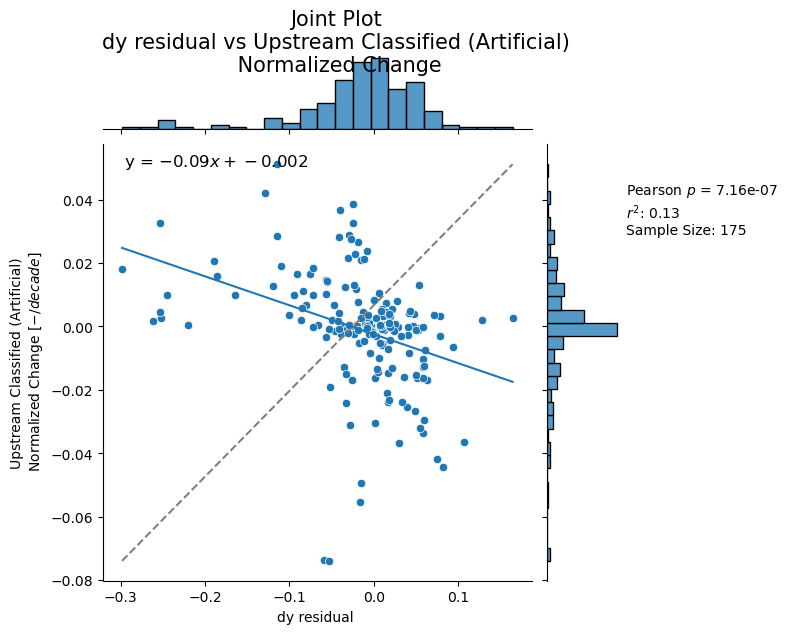

In [1204]:
scatter_vars2(JM_18,'dy_res','ups_r_1_normalized_change',)

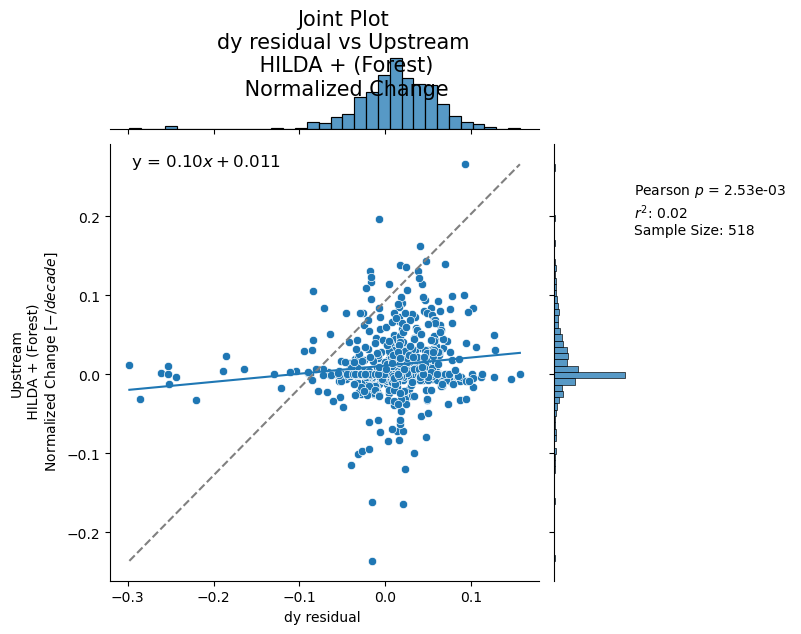

In [1205]:
scatter_vars2(JM_18,'dy_res','ups_h_4_normalized_change',)

In [ ]:
scatter_vars2(MEA,'adj_EI_change_ai','ups_r_1_normalized_change',)
scatter_vars2(MEA,'EI_change','ups_r_1_normalized_change',)
scatter_vars2(MEA,'adj_EI_change_ai','ups_h_1_normalized_change',)
scatter_vars2(MEA,'EI_change','ups_h_1_normalized_change',)

In [ ]:
aridity_table_SR = MEA.sort_values('LT_AI', ascending=False)  # Sort in descending order
aridity_table_SR['AI_group_narrow'] = pd.cut(aridity_table_SR['LT_AI'], AI_levels, labels=labels, ordered=True)
grouped_SR = aridity_table_SR.groupby('AI_group_narrow')
fig, ax = plt.subplots(1, 5, figsize=(30, 7.5), subplot_kw={'projection': 'polar'})

for i, (group, df) in enumerate(grouped_SR):
    if i < 5:
        df = df.dropna(subset=['EI_change', 'AI_change'])
        # Calculate angles and wrap around if necessary
        angles = np.arctan2(df['EI_change'], df['AI_change'])
        angles = np.where(angles > np.pi, angles - 2*np.pi, angles)
        # display(df)
        # break
        color = colors5[i]

        # Calculate the magnitudes of changes
        magnitudes = np.sqrt(df['AI_change']**2 + df['EI_change']**2)

        # Remove nan values from angles and magnitudes simultaneously
        valid_indices = ~np.isnan(angles) & ~np.isnan(magnitudes)
        angles = angles[valid_indices]
        magnitudes = magnitudes[valid_indices]

        # Normalize the magnitudes to a specific range for weighting
        min_weight = 0.1  # Minimum weight
        max_weight = 1.0  # Maximum weight
        normalized_magnitudes = (magnitudes - magnitudes.min()) / (magnitudes.max() - magnitudes.min())
        weights = min_weight + (max_weight - min_weight) * normalized_magnitudes

        x0 = df.AI_mean.min()
        x1 = df.AI_mean.max()

        x = np.linspace(x0, x1, 100)
        y = w_function(x, w)
        slope, intercept, r, p, se = linregress(x, y)
        slope_radians = np.arctan(slope)
        bin_width = 2 * np.pi / 36  # Assuming 36 bins
        print(i, group, len(df))
        # Plot the polar plot in the corresponding subplot
        ax[i].hist(angles, bins=np.linspace(-np.pi, np.pi, num=36), color=color, alpha=0.7)
        ax[i].set_title(f"Polar plot of x: $\Delta AI$, vs y: $\Delta EI$\nGroup={group}, n={len(df.AI_change.dropna())}")

        # Rotate the red and green spans by 90 degrees (or π/2 radians)
        ax[i].axvspan(slope_radians - bin_width/2, slope_radians + bin_width/2, alpha=0.2, color='red')
        ax[i].axvspan(slope_radians - bin_width/2 + np.pi, slope_radians + bin_width/2 + np.pi, alpha=0.2, color='red')
        ax[i].axvspan(-np.pi/2 - bin_width/2, -np.pi/2 + bin_width/2, alpha=0.2, color='green')
        ax[i].axvspan(-np.pi/2 - bin_width/2 + np.pi, -np.pi/2 + bin_width/2 + np.pi, alpha=0.2, color='green')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of tolerances in degrees, then convert to radians
tolerances_deg = np.linspace(0, 90, 100)
tolerances_rad = np.radians(tolerances_deg)

# Initialize lists to store proportions
vertical_proportions = []
expected_proportions = []
slope_rad = []
df = MEA

for tolerance in tolerances_rad:
    # Initialize counters
    vertical_count = 0
    expected_count = 0

    for group, df in grouped_SR:
        dx = df.AI_change
        dy = df.EI_change
        ref = df.omega_mean.mean()

        x = np.linspace(df.AI_mean.min(), df.AI_mean.max())
        y_cur = w_function(x, ref)

        slope, intercept, r, p, se = linregress(x, y_cur)

        slope_radians = np.arctan(slope)  # Compute slope in radians
        
        theta = np.arctan2(dy, dx)  # Compute the angle

        # Count how many angles fall within each quadrant bisected by the vertical and expected directions
        vertical_count += np.sum(np.abs(theta - np.pi/2) <= tolerance)  # Bisects all quadrants around the vertical direction
        expected_count += np.sum(np.abs(theta - slope_radians) <= tolerance)  # Bisects all quadrants around the expected direction
    
    
    # Calculate proportions and store them
    total_vectors = sum([len(df) for group, df in grouped_SR])
    vertical_proportions.append(vertical_count / total_vectors)
    expected_proportions.append(expected_count / total_vectors)

# Plot proportions as functions of tolerance
plt.figure(figsize=(10, 6))
plt.plot(tolerances_deg, vertical_proportions, label='Conforming to EI')
plt.plot(tolerances_deg, expected_proportions, label='Conforming to Expected $\omega$ Shift')
plt.xlabel('Tolerance (degrees)')
plt.ylabel('Proportion')
plt.legend()
plt.title('Proportion of angles conforming to vertical and expected directions')
plt.grid(True)
plt.show()

# Calculate mean average error
mean_average_error = np.mean(np.abs(np.array(expected_proportions) - np.array(vertical_proportions)))

# Print mean average error
print(f"Mean Average Error: {mean_average_error}")

In [ ]:
# # Initialize lists to store proportions
vertical_proportions = []
expected_proportions = []
slope_rad = []
tolerance_fin = []

for i, tolerance in tolerances_rad:
    # Initialize counters
    vertical_count = 0
    expected_count = 0

    for group, df in grouped_SR:
        df = df.dropna(subset=['EI_change', 'AI_change'])

        dx = df.AI_change
        dy = df.adj_EI_change_all

        def estimate_y(AI_mean):
            x = np.linspace(AI_mean * 0.97, AI_mean * 1.03, 100)
            y = w_function(x, w)
            slope, intercept, r, p, se = linregress(x, y)
            return slope

        df['slope'] = df['AI_mean'].map(estimate_y)

        slope_radians = np.arctan(df.slope)

        theta = np.arctan2(dy, dx)  # Compute the angle

        # Count how many angles fall within each quadrant bisected by the vertical and expected directions
        vertical_count += np.sum(np.abs(theta - np.pi/2) <= tolerance)  # Bisects all quadrants around the vertical direction
        expected_count += np.sum(np.abs(theta - slope_radians) <= tolerance)  # Bisects all quadrants around the expected direction

    # Calculate proportions and store them
    total_vectors = sum([len(df) for group, df in grouped_SR])
    vertical_proportions.append(vertical_count / total_vectors)
    expected_proportions.append(expected_count / total_vectors)
    combined_proportion = vertical_proportions[-1] + expected_proportions[-1]
    combined_proportions.append(combined_proportion)
    if combined_proportion >= 1:
        tolerance_fin.append(np.degrees(tolerance))
        

# Plot proportions as functions of tolerance
plt.figure(figsize=(10, 6))
plt.plot(tolerances_deg, vertical_proportions, label='Conforming to adjusted EI')
plt.plot(tolerances_deg, expected_proportions, label='Conforming to Expected $\omega$ Shift')
plt.axvline(tolerance_fin[0], label=f'proportion sum  at {tolerance_fin[0]:.2f}')

plt.xlabel('Tolerance (degrees)')
plt.ylabel('Proportion')
plt.legend()
plt.title('Proportion of angles conforming to vertical and expected directions')
plt.grid(True)
plt.show()

# Calculate mean average error
mean_average_error = np.mean(np.abs(np.array(expected_proportions) - np.array(vertical_proportions)))

# Print mean average error
print(f"Mean Average Error: {mean_average_error}")
# This modified code will iterate over each group in grouped_SR and calculate the angles' conformity with the expected slope in radians. The estimate_y function is used to estimate the slope for each AI_mean value, and the resulting slopes are converted to radians. The angles are compared with both the vertical direction (np.pi/2) and the expected slope, and the counts are accumulated. The proportions are then calculated based on the total number of vectors across all groups. Finally, the proportions are plotted against the tolerance values.

In [ ]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots(3, 5, figsize=(20, 12)) # create a 3 row 5 column subplot grid

for i, (group, df) in enumerate(grouped_SR):
    if i < 5:
        # Convert df.dec_end to datetime and extract year
        df['year'] = pd.to_datetime(df['dec_end']).dt.year
        cmap = plt.get_cmap('viridis')
        norm = mcolors.Normalize(vmin=df['year'].min(), vmax=df['year'].max())

        dx = df.AI_change
        dy = df.EI_change
        ref = df.omega_mean.mean()

        x = np.linspace(df.AI_mean.min(), df.AI_mean.max())
        y_cur = w_function(x, ref)

        slope, intercept, r, p, se = linregress(x, y_cur)
        y_lin = slope * x + intercept
        slope_radians = np.arctan(slope)

        ax[0, i].plot(x, y_lin, c='red')
        scatter = ax[0, i].scatter(df.AI_mean, df.EI_mean, c=df['year'], cmap=cmap, norm=norm)

        ax[1, i].quiver(np.zeros(len(df.AI_change)), np.zeros(len(df.AI_change)), dx, dy, angles='xy', scale_units='xy', scale=1, color=cmap(norm(df['year'])))
        ax[1, i].quiver(0, 0, np.cos(slope_radians), np.sin(slope_radians), angles='xy', scale_units='xy', scale=1, color='red')
        ax[1, i].quiver(0, 0, -np.cos(slope_radians), -np.sin(slope_radians), angles='xy', scale_units='xy', scale=1, color='red')

        max_abs = max(np.max(np.abs(dx))*1.1, np.max(np.abs(dy))*1.1)
        ax[1, i].set_xlim(-max_abs, max_abs)
        ax[1, i].set_ylim(-max_abs, max_abs)

        # Create polar histogram for the angle distribution
        ax[2, i] = plt.subplot(3, 5, i+11, polar=True) # Create a new subplot in polar coordinates
        theta = np.arctan2(dy, dx) # Compute the angle
        bins_number = 36 # You can adjust this value according to your data

        half_bin = np.pi/36
        ax[2, i].hist(theta, bins=bins_number, color=colors5[i], alpha=0.7) # Create a histogram

        ax[2, i].axvline(x=slope_radians, color='red')
        ax[2, i].axvline(x=slope_radians + np.pi, color='red')  # Add pi to the angle to get the negative direction

        ax[2, i].axvspan(slope_radians - half_bin, slope_radians + half_bin, color='red', alpha=0.2)
        ax[2, i].axvspan(slope_radians - half_bin + np.pi, slope_radians + half_bin + np.pi, color='red', alpha=0.2)  # Add pi to the angle to get the negative direction
        ax[2, i].axvspan(0+np.pi/2 + half_bin, 0+np.pi/2 - half_bin, color='green', alpha=0.2)
        ax[2, i].axvspan(np.pi+np.pi/2 - half_bin, np.pi+np.pi/2 + half_bin, color='green', alpha=0.2)  # Add pi to the angle to get the negative direction

    else:
        break

# Add a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(scatter, cax=cbar_ax, label='Year')
# plt.tight_layout()

plt.show()

In [ ]:
for i, (group, df) in enumerate(grouped_SR):
    filtered_df = df.filter(regex='_change$|_mean_diff$|_diff_pct$')

    # Drop columns containing 'p10' or 'p90'
    filtered_df = filtered_df.drop(columns=list(filtered_df.filter(regex='p10|p90').columns.values) +['tot_area_change'])

    keys_to_drop = ['fscore1','fscore2','fscore3','fscore4','fscore5','c_accuracy1','c_accuracy2','c_accuracy3','c_accuracy4','c_accuracy5', 'accuracy', 'year_trained']
    df = filtered_df.loc[:, ~filtered_df.columns.str.contains('score')]
    df = df.loc[:, ~df.columns.str.contains('accuracy')]
    df = df.loc[:, ~df.columns.str.contains('kappa')]
    df = df.loc[:, ~df.columns.str.contains('tot')]

    top_corr_w_adj = top_corr(df, dep_vars+[new_var])

    top_corr_w_adj.to_excel(f'../Outputs/results/ranked_corr_with_adj_EI_{group}.xlsx', index=0)

In [ ]:
new_df = pd.DataFrame()

for i, (group, df) in enumerate(grouped_SR):
    df = pd.read_excel(f'../Outputs/results/ranked_corr_with_adj_EI_{group}.xlsx', index_col=None)
    mask = df['Dependent Variable'].str.contains('adj Evaporative Index Change')
    filtered_df = df[mask].copy()
    filtered_df['Group'] = group
    filtered_df['label'] = i
    
    new_df = pd.concat([new_df, filtered_df])

new_df
    


In [ ]:
translate_col_name('r_3')

In [ ]:
AI_levels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

aridity_table_SR = merge_w_EI_adj.set_index('system_index').sort_values('LT_AI')
aridity_table_SR['AI_group_narrow'] = pd.cut(aridity_table_SR['LT_AI'], AI_levels, labels=labels, ordered=True)

scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[2]],'adj_EI_change','ups_r_3_normalized_change',)
scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[2]],'adj_EI_change','ups_h_4_normalized_change',)
scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[3]],'adj_EI_change','NDVI_mean_change', True)
scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[3]],'adj_EI_change','TCG_mean_change', True)
scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[3]],'adj_EI_change','TCA_mean_change', True)
scatter_vars2(aridity_table_SR[aridity_table_SR.AI_group_narrow==labels[3]],'adj_EI_change','NDMI_mean_change', True)

In [ ]:
merge_w_EI_adj